# **Análisis de canciones: Predicción del género musical**

# Proyecto de Machine Learning

## PARTE I: EDA & FEATURE ENGINEERING

### by Marta Buesa

#### Febrero 2022 

![MartaBuesaProyectoML](portada_ML.png)

Detectar el género de una canción puede ser aparentemente fácil si conocemos el autor, dado que en general suelen moverse dentro de un mismo género musical.

Sin embargo, si se quiere clasificar una canción sin conocer el autor, ya empieza a ser más dificil. Quizás para quienes tienen conocimientos y cultura musical o a quienes les gusta mucho la música pudieran tener una idea del género al que pertenezca una canción al escucharla.

Para ello, se ha tomado una BBDD con una muestra amplia de 50000 canciones pertenecientes a 10 géneros diferentes, y así poder analizar según sus características la predicción del genero musical en el que se clasificarían.

CSV fuente:
https://www.kaggle.com/vicsuperman/prediction-of-music-genre 

## Importo librerias

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## Importo csv barajado

In [101]:
music_df = pd.read_csv("csvs/music_genre_barajado.csv")
music_df.head(10)

,Unnamed: 0,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,0,Lupe Fiasco,XO (feat. Troi Irons),51.0,0.0224,0.662,271871.0,0.922,0.00000,A,0.4990,-4.862,Minor,0.2300,128.137,0.174,Rap
1,1,Grandtheft,Easy Go,49.0,0.1070,0.681,190912.0,0.922,0.00167,F,0.0938,-3.592,Major,0.0779,156.071,0.566,Electronic
2,2,Hollywood Undead,Comin’ In Hot,61.0,0.0146,0.708,-1.0,0.749,0.00000,D,0.0913,-5.640,Major,0.0897,96.016,0.382,Rap
3,3,Santana,Nothing At All (feat. Musiq),40.0,0.1030,0.532,268827.0,0.643,0.00000,G,0.1230,-7.039,Minor,0.0638,?,0.208,Blues
4,4,Pink Martini,Hey Eugene,34.0,0.4420,0.723,-1.0,0.573,0.00010,D,0.1020,-7.303,Major,0.0459,95.802,0.509,Jazz
5,5,DJ Shadow,Organ Donor,41.0,0.8370,0.610,117240.0,0.571,0.74300,C#,0.1500,-7.136,Minor,0.0315,106.185,0.909,Electronic
6,6,Lil Pump,Youngest Flexer (feat. Gucci Mane),55.0,0.2460,0.854,199111.0,0.648,0.00000,A,0.1250,-5.251,Major,0.0808,134.916,0.718,Hip-Hop
7,7,Atmosphere,Modern Man's Hustle,46.0,0.1540,0.859,225227.0,0.609,0.00000,B,0.3480,-3.633,Major,0.2860,85.976,0.649,Hip-Hop
8,8,Brantley Gilbert,Just As I Am,44.0,0.8690,0.384,245946.0,0.380,0.00000,G#,0.3220,-9.560,Major,0.0460,134.885,0.333,Country
9,9,The Black Keys,You're the One,44.0,0.8220,0.594,208227.0,0.462,0.00186,G,0.1230,-10.218,Major,0.0403,?,0.529,Alternative


In [102]:
music_df.drop(columns=['Unnamed: 0'], inplace=True)

Tenemos 15 variables descriptivas de una canción las canciones que son:

- **artist_name**: Nombre del artista de la canción.
- **popularity**: una puntuación arbitraria asignada a la canción en el rango de 0 a 100, siendo 100 la más popular y 0 la menos.
- **acousticness**: este valor describe qué tan acústica es una canción. Una puntuación de 1,0 significa que lo más probable es que la canción sea acústica.
- **danceability**: la bailabilidad describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales. Un valor de 0,0 es menos bailable y 1,0 es más bailable

- **duration_ms** : Es la duración en milisegundos de la canción.
- **energy**: Representa la energía de la canción. El rango de este campo está entre [0-1], siendo 1 la canción con la energía más alta y 0 con la más baja.
- **instrumentalness**: este valor representa la cantidad de voces en la canción. Cuanto más cerca está de 1.0, más instrumental es la canción.

- **key**: La clave de una pieza es el grupo de tonos, o escala, que forma la base de una composición musical.
- **liveness**: este valor describe la probabilidad de que la canción se haya grabado con una audiencia en vivo. [0-1]
- **loudness**: Columna que representa el volumen de la canción.
- **mode**: escalas mayores y menores en las que se basa la canción.

- **speechiness**: Speechiness detecta la presencia de palabras habladas en una pista.
- **tempo**: Velocidad a la que se reproduce la canción.
- **valence**: Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas.
- **music_genre**: la categoría real a la que pertenece la canción. Esta es nuestra variable objetivo.

### Antes de hacer Split quiero observar mi feature 'artist_name' como es

In [103]:
music_df[music_df['artist_name'].isin(['Timbaland'])]


,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
20564,Timbaland,Give It To Me,54.0,0.1700,0.973,234027.0,0.723,0.000282,G#,0.0863,-4.017,Major,0.0569,110.625,0.751,Rap
36525,Timbaland,Carry Out (Featuring Justin Timberlake),63.0,0.1170,0.478,232467.0,0.569,0.066900,A#,0.2480,-6.764,Minor,0.1480,?,0.259,Rap
43222,Timbaland,Say Something (Featuring Drake),55.0,0.0912,0.559,240920.0,0.741,0.000000,B,0.7350,-4.491,Major,0.0889,79.887,0.718,Hip-Hop
48426,Timbaland,Apologize,63.0,0.0399,0.654,-1.0,0.610,0.000000,G#,0.1010,-6.051,Major,0.0285,118.03200000000001,0.118,Rap


In [104]:
music_df[music_df['artist_name'].isin(['Oasis'])]


,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
25425,Oasis,Live Forever - Remastered,55.0,0.000024,0.104,276662.0,0.794,0.000015,A,0.355,-4.353,Minor,0.0426,83.97200000000001,0.179,Rock
47275,Oasis,Champagne Supernova - Remastered,64.0,0.470000,0.286,-1.0,0.796,0.063000,D,0.364,-4.625,Major,0.0388,150.27200000000002,0.120,Rock
49909,Oasis,Don't Look Back In Anger - Remastered,65.0,0.059600,0.333,289559.0,0.922,0.000002,C,0.126,-4.087,Major,0.0592,162.97799999999998,0.335,Rock


In [105]:
music_df[music_df['artist_name'].isin(['OneRepublic'])]

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
687,OneRepublic,Feel Again,58.0,0.019800,0.467,185080.0,0.815,0.000001,G,0.1180,-7.929,Minor,0.0524,140.047,0.335,Rock
5829,OneRepublic,If I Lose Myself - Alesso vs OneRepublic,60.0,0.219000,0.523,214813.0,0.782,0.000010,D,0.1330,-4.846,Major,0.0410,125.99799999999999,0.164,Rap
6043,OneRepublic,Stop And Stare,61.0,0.059300,0.490,-1.0,0.849,0.000000,E,0.0820,-4.234,Major,0.0350,92.494,0.303,Rap
6595,OneRepublic,Secrets,76.0,0.098000,0.515,224693.0,0.767,0.000000,D,0.1210,-6.199,Major,0.0352,148.024,0.380,Rap
9451,OneRepublic,Connection,78.0,0.000837,0.611,148460.0,0.602,0.000000,F,0.1120,-4.890,Major,0.0437,168.15400000000002,0.624,Rap
14863,OneRepublic,Wherever I Go,64.0,0.099500,0.346,-1.0,0.700,0.000000,A#,0.2530,-6.407,Minor,0.0504,100.76799999999999,0.351,Rap
20846,OneRepublic,Love Runs Out,62.0,0.167000,0.719,224227.0,0.935,0.000000,G,0.0973,-3.752,Major,0.0589,120.022,0.738,Rap
25808,OneRepublic,Future Looks Good,59.0,0.200000,0.334,210587.0,0.546,0.000006,A#,0.1150,-7.906,Major,0.0588,79.298,0.557,Rock
28182,OneRepublic,Start Again (feat. Logic),75.0,0.162000,0.564,165627.0,0.722,0.000000,C#,0.0931,-5.590,Minor,0.1240,99.083,0.276,Rock
30462,OneRepublic,No Vacancy,69.0,0.055600,0.720,223190.0,0.727,0.000000,F,0.1380,-3.882,Major,0.0489,?,0.481,Rock


In [106]:
music_df[music_df['music_genre'].isin(['Rock'])][['artist_name', 'music_genre']].value_counts()

artist_name          music_genre
empty_field          Rock           242
The Beatles          Rock            81
Queen                Rock            45
Panic! At The Disco  Rock            43
Led Zeppelin         Rock            43
                                   ... 
Lee Roy Parnell      Rock             1
Leo Sayer            Rock             1
Less Than Jake       Rock             1
Level 42             Rock             1
watt                 Rock             1
Length: 1452, dtype: int64

In [107]:
music_df.music_genre.unique().tolist()

['Rap',
 'Electronic',
 'Blues',
 'Jazz',
 'Hip-Hop',
 'Country',
 'Alternative',
 'Rock',
 'Classical',
 'Anime']

In [108]:
df = pd.DataFrame()
for i in music_df.music_genre.unique().tolist():
    print('\nGenero:',i)
    artist_genre = music_df[(music_df.music_genre == i)]['artist_name'].value_counts()
    gen = pd.DataFrame(artist_genre)
    df[i] = gen

df  


Genero: Rap

Genero: Electronic

Genero: Blues

Genero: Jazz

Genero: Hip-Hop

Genero: Country

Genero: Alternative

Genero: Rock

Genero: Classical

Genero: Anime


,Rap,Electronic,Blues,Jazz,Hip-Hop,Country,Alternative,Rock,Classical,Anime
empty_field,263,223.0,255.0,230.0,245.0,221.0,272.0,242.0,266.0,272.0
Drake,81,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN
Kanye West,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eminem,56,NaN,NaN,NaN,91.0,NaN,NaN,NaN,NaN,NaN
Future,53,NaN,NaN,NaN,71.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
Boyz N Da Hood,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Jean Michael,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crucifix,1,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
Joey Purp,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **Veo que hay registros de un autor con varias canciones clasificadas en diferentes géneros musicales**.

In [109]:
music_df.drop(columns=['track_name'], inplace=True) 

## 5. TRAIN / TEST SPLIT

### Divido el dataset por Features y Target

In [110]:
X = music_df.drop('music_genre', axis=1)
y = music_df['music_genre']

In [111]:
# Veo como queda mi tabla de Features
X

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,Lupe Fiasco,51.0,0.022400,0.662,271871.0,0.922,0.000000,A,0.4990,-4.862,Minor,0.2300,128.137,0.174
1,Grandtheft,49.0,0.107000,0.681,190912.0,0.922,0.001670,F,0.0938,-3.592,Major,0.0779,156.071,0.566
2,Hollywood Undead,61.0,0.014600,0.708,-1.0,0.749,0.000000,D,0.0913,-5.640,Major,0.0897,96.016,0.382
3,Santana,40.0,0.103000,0.532,268827.0,0.643,0.000000,G,0.1230,-7.039,Minor,0.0638,?,0.208
4,Pink Martini,34.0,0.442000,0.723,-1.0,0.573,0.000100,D,0.1020,-7.303,Major,0.0459,95.802,0.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Wolfgang Amadeus Mozart,0.0,0.974000,0.528,214096.0,0.188,0.959000,A,0.1430,-16.671,Major,0.0557,126.705,0.868
49996,Johann Sebastian Bach,0.0,0.994000,0.514,31787.0,0.144,0.003390,G#,0.1140,-17.243,Major,0.0486,?,0.253
49997,Crazy P,47.0,0.000535,0.714,246399.0,0.816,0.339000,A#,0.0685,-6.818,Minor,0.0330,114.991,0.335
49998,Ai Otsuka,37.0,0.683000,0.502,272767.0,0.453,0.000035,D#,0.1040,-8.033,Major,0.0315,?,0.332


In [112]:
# Veo como queda mi tabla de Target
y

0               Rap
1        Electronic
2               Rap
3             Blues
4              Jazz
            ...    
49995     Classical
49996     Classical
49997          Jazz
49998         Anime
49999         Anime
Name: music_genre, Length: 50000, dtype: object

In [113]:
# Divido en TRAIN & TEST
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
# Veo la forma de TRAIN y de test
print('TRAIN:\nX_train: ', X_train.shape)
print('y_train: ', y_train.shape)

print('\nTEST:\nX_test: ', X_test.shape)
print('y_test: ', y_test.shape)

TRAIN:
X_train:  (40000, 14)
y_train:  (40000,)

TEST:
X_test:  (10000, 14)
y_test:  (10000,)


### Observo como ha quedado de balanceado mi TARGET

In [115]:
# Miro como han quedado de balanceados los generos en mi TARGET de TRAIN
from collections import Counter

counter_train = Counter(y_train)

for gen, valor in counter_train.items():
    num = float(valor/(y_train.shape[0])*100)
    print(gen,':', round(num, 2), '%')

Electronic : 9.98 %
Blues : 9.98 %
Classical : 10.08 %
Country : 10.04 %
Alternative : 9.99 %
Anime : 10.03 %
Rap : 9.94 %
Jazz : 10.04 %
Rock : 9.97 %
Hip-Hop : 9.96 %


#### Bien!!!!! obtengo una representación balanceada de los 10 géneros musicales

## 6. Exploratory Data Analysis

### Hago un reporte de X_train

In [116]:
def data_report(df):
    '''
    Función que me devuelve un tabla reporte con aspectos que considero claves, el tipo de dato, los missings, valores unicos y su cardinalidad
    
    '''
    # Saco los nombres de las variables
    cols = pd.DataFrame(df.columns.values, columns=['COL_N'])
    
    # Saco los tipos de datos
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])
    
    # Saco los missings
    percent_missing = round(df.isnull().sum()*100/len(df),2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns = ["MISSINGS (%)"])

    # Saco los valores unicos
    unicos = pd.DataFrame(df.nunique().values, columns = ["UNIQUE_VALUES"])

    # Saco la cardinalidad
    percent_cardin = round(unicos["UNIQUE_VALUES"]*100/len(df),2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns = ["CARDIN (%)"])
      
    # tabla concatenada
    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1)
    concatenado.set_index('COL_N', drop=True, inplace=True)

    return concatenado


data_report(X_train)

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
COL_N,,,,
artist_name,object,0.0,6307,15.77
popularity,float64,0.0,99,0.25
acousticness,float64,0.0,4039,10.10
danceability,float64,0.0,1062,2.66
duration_ms,float64,0.0,22498,56.24
energy,float64,0.0,1992,4.98
instrumentalness,float64,0.0,4991,12.48
key,object,0.0,12,0.03
liveness,float64,0.0,1611,4.03


### Así también observo mi tabla X_TRAIN

In [117]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 39087 to 15795
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       40000 non-null  object 
 1   popularity        40000 non-null  float64
 2   acousticness      40000 non-null  float64
 3   danceability      40000 non-null  float64
 4   duration_ms       40000 non-null  float64
 5   energy            40000 non-null  float64
 6   instrumentalness  40000 non-null  float64
 7   key               40000 non-null  object 
 8   liveness          40000 non-null  float64
 9   loudness          40000 non-null  float64
 10  mode              40000 non-null  object 
 11  speechiness       40000 non-null  float64
 12  tempo             40000 non-null  object 
 13  valence           40000 non-null  float64
dtypes: float64(10), object(4)
memory usage: 4.6+ MB


#### Bien!!! no hay valores nulos

In [118]:
# También un resumen descriptivo de como son los datos en cada columna
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,40000.0,44.198775,15.528586,0.000000,34.00000,45.000000,55.0000,99.000
acousticness,40000.0,0.307490,0.342177,0.000000,0.02000,0.144000,0.5570,0.996
danceability,40000.0,0.557862,0.178730,0.060600,0.44100,0.568000,0.6870,0.986
duration_ms,40000.0,221151.200450,129689.682578,-1.000000,174601.50000,219019.000000,268190.2500,4830606.000
energy,40000.0,0.599679,0.265530,0.000795,0.43175,0.644000,0.8170,0.999
instrumentalness,40000.0,0.182017,0.325498,0.000000,0.00000,0.000163,0.1570,0.994
liveness,40000.0,0.193265,0.160514,0.009670,0.09680,0.126000,0.2430,1.000
loudness,40000.0,-9.149487,6.199196,-46.122000,-10.86225,-7.260000,-5.1750,3.744
speechiness,40000.0,0.093489,0.101157,0.022300,0.03620,0.048900,0.0983,0.942
valence,40000.0,0.455963,0.246956,0.000000,0.25800,0.447000,0.6480,0.992


### Visualizo la distribución de las features

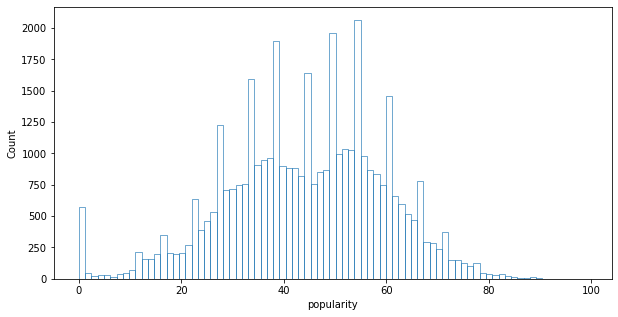

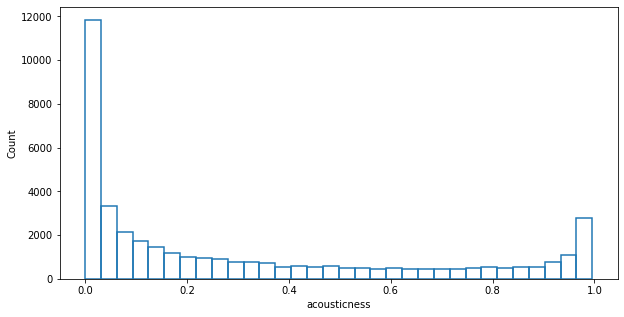

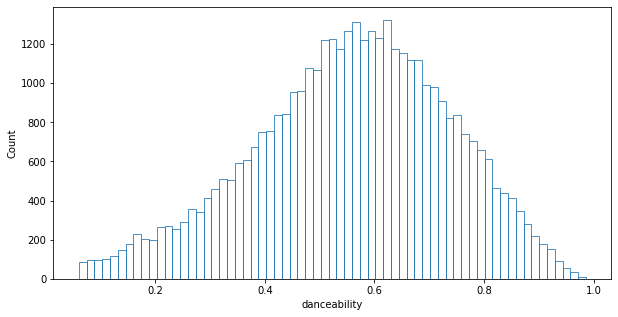

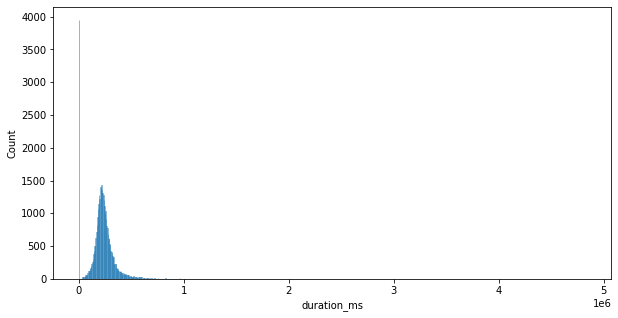

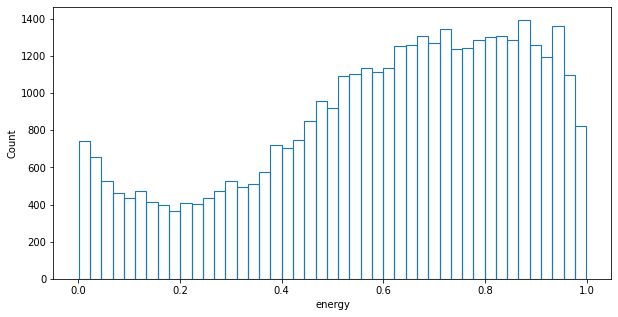

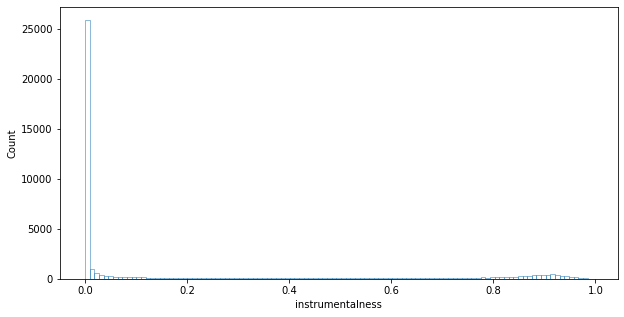

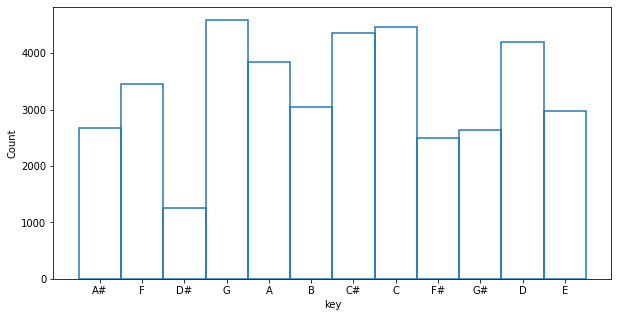

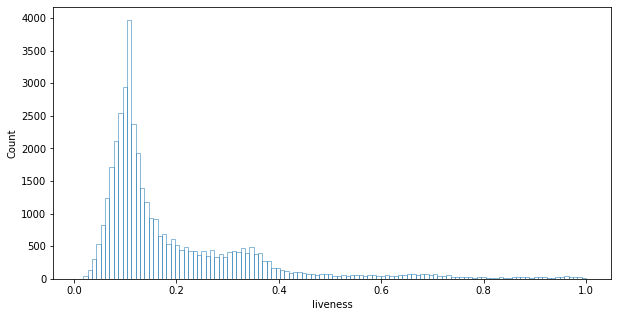

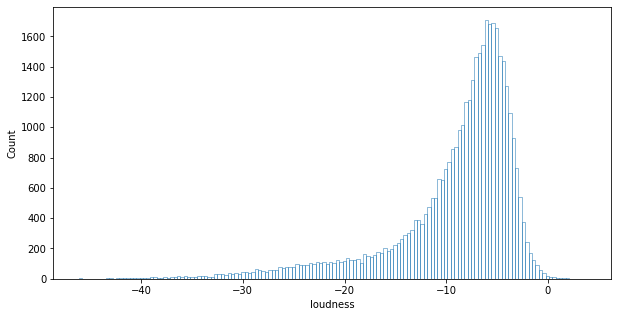

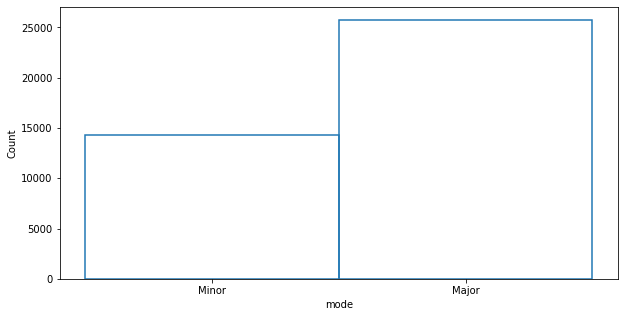

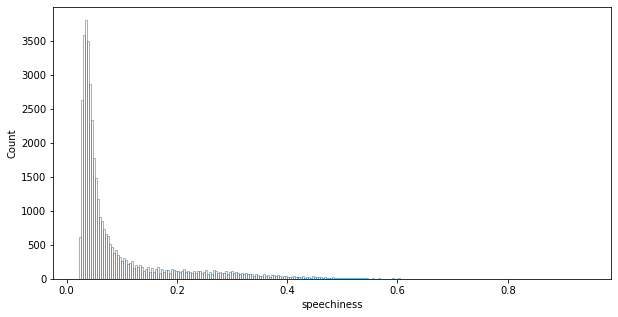

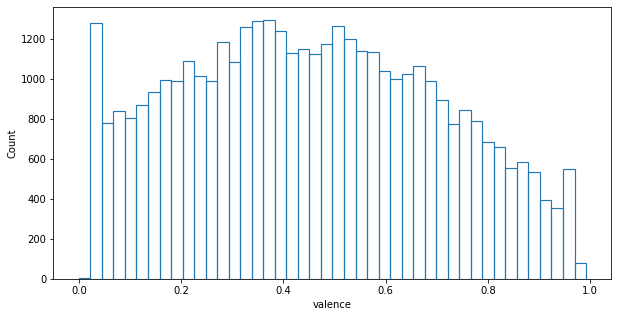

In [119]:
# Quiero ver graficamente sus distribuciones
for column in X_train.columns[1:-2]:
    plt.figure(figsize=[10,5])
    sns.histplot(X_train[column], fill=False)
for column in X_train.columns[13:14]:
    plt.figure(figsize=[10,5])
    sns.histplot(X_train[column], fill=False)

### Observo la variable 'artista' para decidir si me quedo o no con ella

In [120]:
# Cuantos artistas tiene el dataset
howmany = len(X_train.artist_name.unique())
howmany

6307

In [121]:
# Que artistas aparecen mas veces
X_train['artist_name'].value_counts().head(20)

empty_field                 1996
Nobuo Uematsu                337
Wolfgang Amadeus Mozart      330
Johann Sebastian Bach        259
Ludwig van Beethoven         249
Frédéric Chopin              192
Yuki Hayashi                 141
Drake                        141
Capcom Sound Team            131
Eminem                       113
Future                        99
Thievery Corporation          95
The Black Keys                87
Pyotr Ilyich Tchaikovsky      82
$uicideBoy$                   79
Kevin Gates                   79
Ryuichi Sakamoto              78
Logic                         78
Mac Miller                    78
ASIAN KUNG-FU GENERATION      75
Name: artist_name, dtype: int64

In [122]:
'''
observo artistas de la BBDD
for col in X_train[1:2]:
    print(col)
    print(sorted(X_train[col].unique()))
'''

'\nobservo artistas de la BBDD\nfor col in X_train[1:2]:\n    print(col)\n    print(sorted(X_train[col].unique()))\n'

Artistas en mi dataset


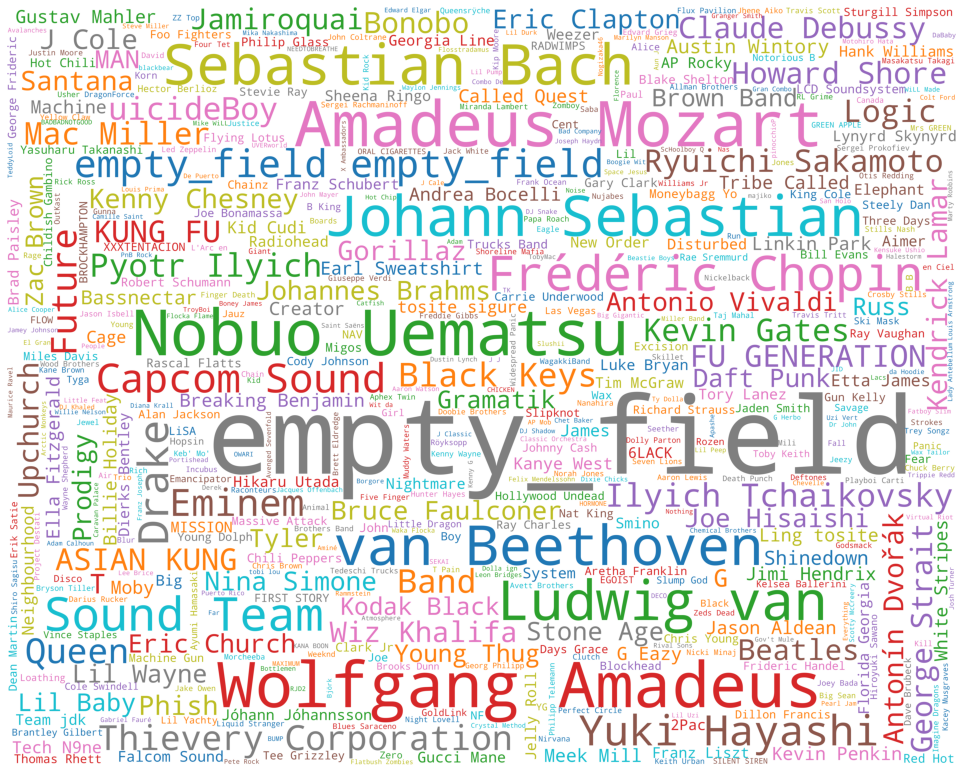

In [123]:
# Lo visualizo en nube de palabras
artistas = X_train['artist_name']

from wordcloud import WordCloud, STOPWORDS

# Veo visualmente que artista aparece mas veces
def wordcloud_draw(artistas, color = 'white'):
    words = ' '.join(artistas)
    wordcloud = WordCloud(background_color=color,
                      width=2500,
                      height=2000,
                      max_words=500, 
                      contour_width=0, 
                      contour_color='steelblue', 
                      colormap='tab10',
                      scale =3).generate(words)
    plt.figure(1, figsize = (17, 15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Artistas en mi dataset")
wordcloud_draw(artistas)


In [124]:
# Cuanto representan los 'empty_field'
print('Canciones sin artista representan un ', (X_train['artist_name'].value_counts().head(20)[0]/X_train['artist_name'].shape[0])*100, '%')

Canciones sin artista representan un  4.99 %


#### **Un 5% de las canciones de X_train no tienen asignado artista.** 

#### Asi que viendo que es posible tener canciones sin artista y que ciertos artistas de al BBDD también se les clasifica algunas de sus caciones en diferetes géneros, voy a aislar esta variable y **hacer mi modelo sin esta variable, para ver si el resto de variables pueden predecir el genero de una canción.**

In [125]:
X_train.drop(columns=['artist_name'], inplace=True) 

### Correlación entre columnas que interesan

In [126]:
X_train.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
popularity,1.000000,-0.288638,0.356987,-0.081733,0.213893,-0.364538,-0.040536,0.314365,0.221541,0.122223
acousticness,-0.288638,1.000000,-0.348626,0.061613,-0.793362,0.390490,-0.112096,-0.732228,-0.163944,-0.272113
danceability,0.356987,-0.348626,1.000000,-0.157170,0.266085,-0.303349,-0.049493,0.393531,0.278164,0.436016
duration_ms,-0.081733,0.061613,-0.157170,1.000000,-0.066069,0.131267,0.020936,-0.102046,-0.082559,-0.132199
energy,0.213893,-0.793362,0.266085,-0.066069,1.000000,-0.391349,0.186709,0.839255,0.159607,0.397173
instrumentalness,-0.364538,0.390490,-0.303349,0.131267,-0.391349,1.000000,-0.091534,-0.529829,-0.198967,-0.271841
liveness,-0.040536,-0.112096,-0.049493,0.020936,0.186709,-0.091534,1.000000,0.128312,0.114774,0.049126
loudness,0.314365,-0.732228,0.393531,-0.102046,0.839255,-0.529829,0.128312,1.000000,0.167283,0.341359
speechiness,0.221541,-0.163944,0.278164,-0.082559,0.159607,-0.198967,0.114774,0.167283,1.000000,0.058167
valence,0.122223,-0.272113,0.436016,-0.132199,0.397173,-0.271841,0.049126,0.341359,0.058167,1.000000


### Quiero ver la correlación con la variable Target

Quito para la visualizacion la columna 'tempo' debido a su gran volumen de datos diferentes

In [127]:
# Guardo mi columna tempo
mi_tempo = X_train['tempo']

In [128]:
# Quito para la visualizacion la columna 'tempo' debido a su gran volumen de datos diferentes
X_train_notempo = X_train.drop(columns=['tempo']) 

In [129]:
train_total = pd.concat([X_train_notempo, y_train], axis=1)
train_total

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,valence,music_genre
39087,37.0,0.001610,0.889,860761.0,0.4800,0.835000,A#,0.0514,-12.380,Minor,0.0747,0.0751,Electronic
30893,26.0,0.148000,0.481,345253.0,0.7760,0.000000,F,0.7190,-8.404,Minor,0.0388,0.3720,Blues
45278,21.0,0.960000,0.242,480013.0,0.1130,0.844000,D#,0.1130,-21.232,Major,0.0349,0.1170,Classical
16398,47.0,0.328000,0.798,219960.0,0.5380,0.002060,G,0.1820,-11.412,Major,0.0363,0.6770,Blues
13653,39.0,0.031800,0.573,-1.0,0.7430,0.000000,G,0.1520,-6.047,Minor,0.0374,0.6060,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,43.0,0.930000,0.369,689520.0,0.0461,0.000307,D,0.0403,-23.665,Major,0.0512,0.0375,Classical
44732,44.0,0.016100,0.683,182000.0,0.6800,0.000000,A#,0.3190,-5.861,Minor,0.0376,0.5570,Electronic
38158,42.0,0.004630,0.302,395653.0,0.9190,0.000007,D,0.1280,-4.719,Major,0.1830,0.4990,Alternative
860,40.0,0.000191,0.246,443267.0,0.9400,0.130000,F#,0.1470,-5.598,Minor,0.1670,0.3470,Jazz


### Hago mapa de calor para ver la relación de las Features con el TARGET

interval columns not set, guessing: ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']


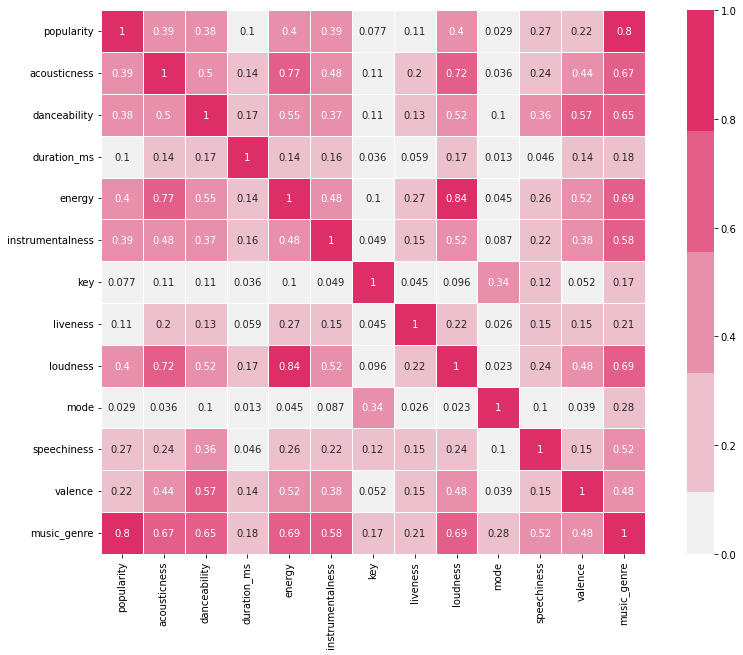

In [130]:
import phik
phik_matrix = train_total.phik_matrix()

plt.figure(figsize=(15,10))
sns.heatmap(phik_matrix,
            vmin=0,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(20, 0, s=85, n=9),
            square=True,
            annot=True,
            linewidths=.5);

In [131]:
phik_matrix

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,valence,music_genre
popularity,1.000000,0.385223,0.380677,0.104897,0.402999,0.386054,0.076901,0.110713,0.399781,0.029280,0.274919,0.220919,0.795374
acousticness,0.385223,1.000000,0.495310,0.139681,0.770650,0.482505,0.108207,0.200751,0.716510,0.036031,0.235424,0.436199,0.671784
danceability,0.380677,0.495310,1.000000,0.170081,0.552053,0.368964,0.110797,0.128357,0.515522,0.103762,0.355617,0.568639,0.646727
duration_ms,0.104897,0.139681,0.170081,1.000000,0.143819,0.156709,0.035644,0.058539,0.168652,0.012834,0.045682,0.142236,0.184520
energy,0.402999,0.770650,0.552053,0.143819,1.000000,0.475086,0.100271,0.272879,0.840405,0.045113,0.256194,0.516215,0.686726
instrumentalness,0.386054,0.482505,0.368964,0.156709,0.475086,1.000000,0.049442,0.151834,0.523391,0.086674,0.221007,0.378956,0.580022
key,0.076901,0.108207,0.110797,0.035644,0.100271,0.049442,1.000000,0.044673,0.096342,0.341835,0.117624,0.051819,0.169932
liveness,0.110713,0.200751,0.128357,0.058539,0.272879,0.151834,0.044673,1.000000,0.219848,0.026342,0.146887,0.146590,0.214453
loudness,0.399781,0.716510,0.515522,0.168652,0.840405,0.523391,0.096342,0.219848,1.000000,0.022922,0.236767,0.476243,0.689158
mode,0.029280,0.036031,0.103762,0.012834,0.045113,0.086674,0.341835,0.026342,0.022922,1.000000,0.104791,0.039475,0.282082


#### Observo que las **correlaciones más fuertes con el Target están en las variables Popularity, Energy, Loudness, Acousticness & Danceability**.


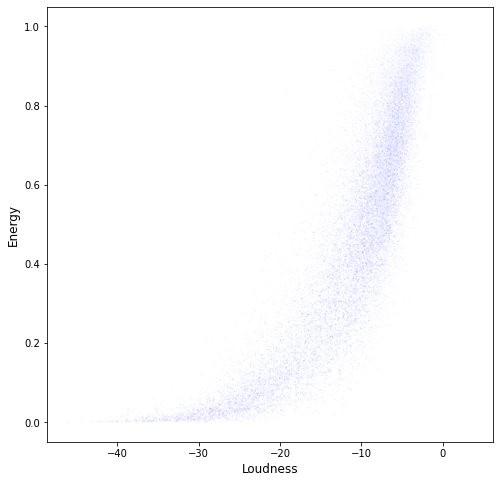

In [132]:
plt.figure(figsize=(8,8))

plt.scatter(x=train_total['loudness'], y=train_total['energy'], s=train_total['acousticness']*0.0005, color='blue')
plt.xlabel('Loudness',fontsize=12)
plt.ylabel('Energy',fontsize=12)
plt.show()

### Se aprecia ademas colinealidad también entre 3 de esas variables del target

### Voy a ordenar por Feature Importance

In [133]:
corr = np.abs(phik_matrix.corr()['music_genre']).sort_values(ascending=False)
print(corr)

# Features con menos de 0.1 de correlación vs el target
bad_corr_feat = corr[corr < 0.1].index.values

# Filtramos las columnas buenas
phik_matrix.drop(columns=bad_corr_feat, inplace=True)

music_genre         1.000000
popularity          0.871384
loudness            0.759618
acousticness        0.756840
energy              0.751586
danceability        0.720497
instrumentalness    0.661104
valence             0.493024
speechiness         0.417836
key                 0.398600
mode                0.262700
duration_ms         0.233148
liveness            0.149912
Name: music_genre, dtype: float64


In [134]:
train_total = pd.concat([train_total, mi_tempo], axis=1)

train_total.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,valence,music_genre,tempo
39087,37.0,0.00161,0.889,860761.0,0.480,0.83500,A#,0.0514,-12.380,Minor,0.0747,0.0751,Electronic,100.00200000000001
30893,26.0,0.14800,0.481,345253.0,0.776,0.00000,F,0.7190,-8.404,Minor,0.0388,0.3720,Blues,98.37200000000001
45278,21.0,0.96000,0.242,480013.0,0.113,0.84400,D#,0.1130,-21.232,Major,0.0349,0.1170,Classical,80.195
16398,47.0,0.32800,0.798,219960.0,0.538,0.00206,G,0.1820,-11.412,Major,0.0363,0.6770,Blues,81.018
13653,39.0,0.03180,0.573,-1.0,0.743,0.00000,G,0.1520,-6.047,Minor,0.0374,0.6060,Country,141.91899999999998


### Por tanto voy a quitar 2 columnas de las features para evitar colinealidad

In [135]:
train_total.drop(columns=['acousticness', 'energy'], inplace=True) 
train_total

,popularity,danceability,duration_ms,instrumentalness,key,liveness,loudness,mode,speechiness,valence,music_genre,tempo
39087,37.0,0.889,860761.0,0.835000,A#,0.0514,-12.380,Minor,0.0747,0.0751,Electronic,100.00200000000001
30893,26.0,0.481,345253.0,0.000000,F,0.7190,-8.404,Minor,0.0388,0.3720,Blues,98.37200000000001
45278,21.0,0.242,480013.0,0.844000,D#,0.1130,-21.232,Major,0.0349,0.1170,Classical,80.195
16398,47.0,0.798,219960.0,0.002060,G,0.1820,-11.412,Major,0.0363,0.6770,Blues,81.018
13653,39.0,0.573,-1.0,0.000000,G,0.1520,-6.047,Minor,0.0374,0.6060,Country,141.91899999999998
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,43.0,0.369,689520.0,0.000307,D,0.0403,-23.665,Major,0.0512,0.0375,Classical,135.674
44732,44.0,0.683,182000.0,0.000000,A#,0.3190,-5.861,Minor,0.0376,0.5570,Electronic,145.042
38158,42.0,0.302,395653.0,0.000007,D,0.1280,-4.719,Major,0.1830,0.4990,Alternative,172.946
860,40.0,0.246,443267.0,0.130000,F#,0.1470,-5.598,Minor,0.1670,0.3470,Jazz,94.17399999999999


## 7. DATA CLEANING & FEATURE ENGINEERING:  SOBRE TRAIN

### 7.A. ZOOM y tratamiento columna 'duration_ms'

#### Observo la columna duración para ver que registros tienen muchos milisegundos

In [136]:
train_total['duration_ms'].value_counts()

-1.0         3949
 192000.0      26
 240000.0      26
 180000.0      20
 216000.0      18
             ... 
 152381.0       1
 288696.0       1
 42973.0        1
 185010.0       1
 443267.0       1
Name: duration_ms, Length: 22498, dtype: int64

#### Canciones con una duración no posible, donde aparece '-1' voy a sustituir por la mediana de la duración

In [137]:
train_total[(train_total['duration_ms'] < 0)]

,popularity,danceability,duration_ms,instrumentalness,key,liveness,loudness,mode,speechiness,valence,music_genre,tempo
13653,39.0,0.573,-1.0,0.00000,G,0.1520,-6.047,Minor,0.0374,0.606,Country,141.91899999999998
7195,45.0,0.501,-1.0,0.92100,G,0.1060,-17.766,Major,0.0567,0.393,Classical,89.14299999999999
10474,12.0,0.530,-1.0,0.91500,F,0.1640,-7.763,Major,0.0410,0.710,Anime,133.262
1185,52.0,0.447,-1.0,0.15300,D,0.1050,-18.663,Major,0.0337,0.511,Alternative,105.669
46701,67.0,0.711,-1.0,0.00226,G,0.0528,-8.784,Minor,0.0305,0.645,Rock,120.116
...,...,...,...,...,...,...,...,...,...,...,...,...
44974,62.0,0.433,-1.0,0.00107,E,0.3510,-4.452,Major,0.0296,0.540,Rock,82.99799999999999
23483,23.0,0.378,-1.0,0.83900,E,0.1150,-26.164,Minor,0.0410,0.156,Anime,60.52
43001,63.0,0.730,-1.0,0.01010,C,0.1470,-9.274,Major,0.0238,0.721,Rap,100.021
30740,49.0,0.728,-1.0,0.00000,D,0.0871,-6.049,Major,0.3790,0.305,Rap,139.863


In [138]:
# Calculo la mediana de duracion en milisegundos y minutos
mediana = train_total['duration_ms'].median()
mediana_min = mediana * 1.66/100000
print('La mediana de las canciones está en los ', round(mediana,2), 'milisegundos, es decir ', round(mediana_min,2), 'minutos')

La mediana de las canciones está en los  219019.0 milisegundos, es decir  3.64 minutos


In [139]:
# Sustituyo las duraciones de -1, que no son posibles, por la mediana
train_total['duration_ms'] = train_total['duration_ms'].replace(-1, mediana)

train_total['duration_ms']

39087    860761.0
30893    345253.0
45278    480013.0
16398    219960.0
13653    219019.0
           ...   
11284    689520.0
44732    182000.0
38158    395653.0
860      443267.0
15795    211200.0
Name: duration_ms, Length: 40000, dtype: float64

In [140]:
# Observo que hay canciones con duración inferior a 1min , vale!
train_total[train_total['duration_ms']<60000]

,popularity,danceability,duration_ms,instrumentalness,key,liveness,loudness,mode,speechiness,valence,music_genre,tempo
28243,20.0,0.444,35507.0,0.822000,C,0.1450,-32.205,Major,0.0380,0.6520,Classical,112.20700000000001
29880,38.0,0.497,37627.0,0.000965,A#,0.1280,-23.330,Minor,0.5330,0.9650,Electronic,?
48635,28.0,0.734,55573.0,0.376000,G,0.1440,-5.474,Major,0.2740,0.3900,Electronic,91.15299999999999
4593,6.0,0.633,44373.0,0.000000,F#,0.4650,-19.937,Minor,0.5010,0.5950,Classical,?
40621,0.0,0.224,32907.0,0.007380,C#,0.1020,-25.002,Minor,0.0459,0.1850,Classical,?
...,...,...,...,...,...,...,...,...,...,...,...,...
17771,26.0,0.395,50040.0,0.932000,B,0.0835,-32.582,Minor,0.0458,0.0461,Classical,114.751
38727,0.0,0.450,40200.0,0.839000,C,0.1060,-22.644,Major,0.0952,0.2820,Classical,64.28399999999999
38141,57.0,0.610,51827.0,0.000001,F#,0.2930,-9.696,Minor,0.0286,0.7620,Hip-Hop,99.917
18935,0.0,0.351,59533.0,0.000033,A#,0.1100,-28.269,Major,0.0627,0.0372,Classical,73.942


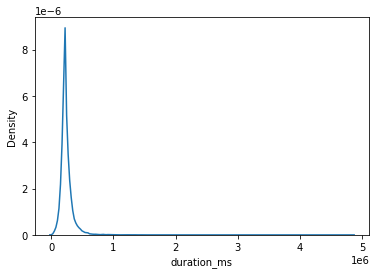

In [141]:
# Cuanto de normal es la variable 'duracion', lo veo con Q-Q plot
sns.kdeplot(train_total['duration_ms']);

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


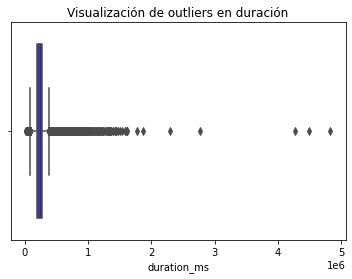

In [142]:
# Visualizo los outliers con un grafico de caja con bigotes
sns.boxplot(train_total['duration_ms'], color = 'b')
plt.title('Visualización de outliers en duración');

#### Voy a observar los outliers teniendo en cuenta los cuartiles Q1 y Q3 de la columna 'duracion_ms'

In [143]:
from scipy.stats import iqr

def outliers_quantie(df, feature, param=1.5):  
    '''
    Función que define los Q1 y Q3 de una muestra de datos para localizar los outliers 
    '''    
    iqr_ = iqr(df[feature], nan_policy='omit')
    
    q1 = np.nanpercentile(df[feature], 25)
    q3 = np.nanpercentile(df[feature], 75)
    
    th1 = q1 - iqr_*param
    th2 = q3 + iqr_*param
    print('Límite corte inferior outliers:', th1)
    print('Límite corte superior outliers:', th2)
    outliers_inferiores = df[df[feature] < th1]
    outliers_superiores = df[df[feature] > th2]
    print('\nOutliers Inferiores')
    print(len(outliers_inferiores))
    maxinf = outliers_inferiores[feature].max()
    print('\nOutliers Superiores')
    print(len(outliers_superiores))
    minisup = outliers_superiores[feature].min()
    print('La duración minima del outlier:', round(minisup,2))
       
    return df[(df[feature] >= th1) & (df[feature] <= th2)], minisup, maxinf

train_no_out_dura, mili_cortesuperior, mili_corteinferior = outliers_quantie(train_total, 'duration_ms', 7)
print('La duración minima equivale a ', round(mili_cortesuperior* 1.66/100000,2), 'minutos')
print('\ntrain original tiene:', len(train_total), 'canciones')
print('train sin outliers tiene:', len(train_no_out_dura), 'canciones')
dif = len(train_total) - len(train_no_out_dura)
print('Diferencia:', dif)
print('Porcentaje sobre X_train:', round((dif/len(train_total))*100, 2),'%')

Límite corte inferior outliers: -320663.75
Límite corte superior outliers: 783437.5

Outliers Inferiores
0

Outliers Superiores
186
La duración minima del outlier: 786600.0
La duración minima equivale a  13.06 minutos

train original tiene: 40000 canciones
train sin outliers tiene: 39814 canciones
Diferencia: 186
Porcentaje sobre X_train: 0.46 %


In [144]:
train_no_out_dura.shape

(39814, 12)

In [145]:
# Que registros duran más de 16min
train_total[train_total['duration_ms'] >= mili_cortesuperior]

,popularity,danceability,duration_ms,instrumentalness,key,liveness,loudness,mode,speechiness,valence,music_genre,tempo
39087,37.0,0.8890,860761.0,0.8350,A#,0.0514,-12.380,Minor,0.0747,0.0751,Electronic,100.00200000000001
9701,14.0,0.0977,964307.0,0.0328,B,0.0727,-23.341,Minor,0.0419,0.0393,Classical,61.606
4230,30.0,0.3520,1389372.0,0.5160,E,0.3190,-10.528,Minor,0.0512,0.2570,Blues,111.42299999999999
29780,26.0,0.5350,932493.0,0.6440,C#,0.7070,-12.025,Major,0.0393,0.3560,Blues,139.559
36066,48.0,0.3390,823787.0,0.9260,D#,0.1000,-18.292,Major,0.0364,0.1060,Classical,?
...,...,...,...,...,...,...,...,...,...,...,...,...
5801,26.0,0.3280,928787.0,0.9090,C,0.1180,-18.678,Minor,0.0372,0.1510,Classical,126.898
38467,26.0,0.2600,1147600.0,0.8350,D#,0.1050,-23.447,Major,0.0368,0.0809,Classical,137.661
37504,33.0,0.2430,1180560.0,0.9430,G,0.0828,-14.961,Major,0.0860,0.0377,Electronic,73.722
17262,47.0,0.4220,840387.0,0.6430,D,0.1340,-17.313,Major,0.0497,0.4140,Classical,136.039


In [146]:
largos = train_total[train_total['duration_ms'] >= mili_cortesuperior]

In [147]:
# Observo a que generos pertenecen las canciones largas

largos.groupby('music_genre').aggregate({'duration_ms': ['min', 'max', 'count']})


duration_ms                 
                    min        max count
music_genre                             
Anime          786600.0  1295600.0     6
Blues          787005.0  1509587.0    22
Classical      788400.0  2294000.0   129
Electronic     822640.0  4830606.0    13
Jazz           790560.0  1352413.0    15
Rock           811077.0   811077.0     1

In [148]:
train_total[train_total['duration_ms'] < mili_cortesuperior].groupby('music_genre').aggregate({'duration_ms': ['count']})

,duration_ms
,count
music_genre,
Alternative,3997
Anime,4004
Blues,3970
Classical,3902
Country,4014
Electronic,3978
Hip-Hop,3984
Jazz,4000


#### **Quitando los outliers, todavia tengo una muestra suficientemente balanceada de todos los géneros musicales**

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


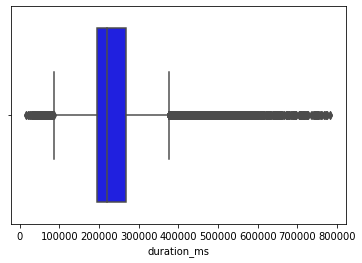

In [149]:
# Muestro grafico boxplot para ver como ha quedado quitando los outliers
sns.boxplot(train_no_out_dura['duration_ms'], color= 'b');

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Box-cox')

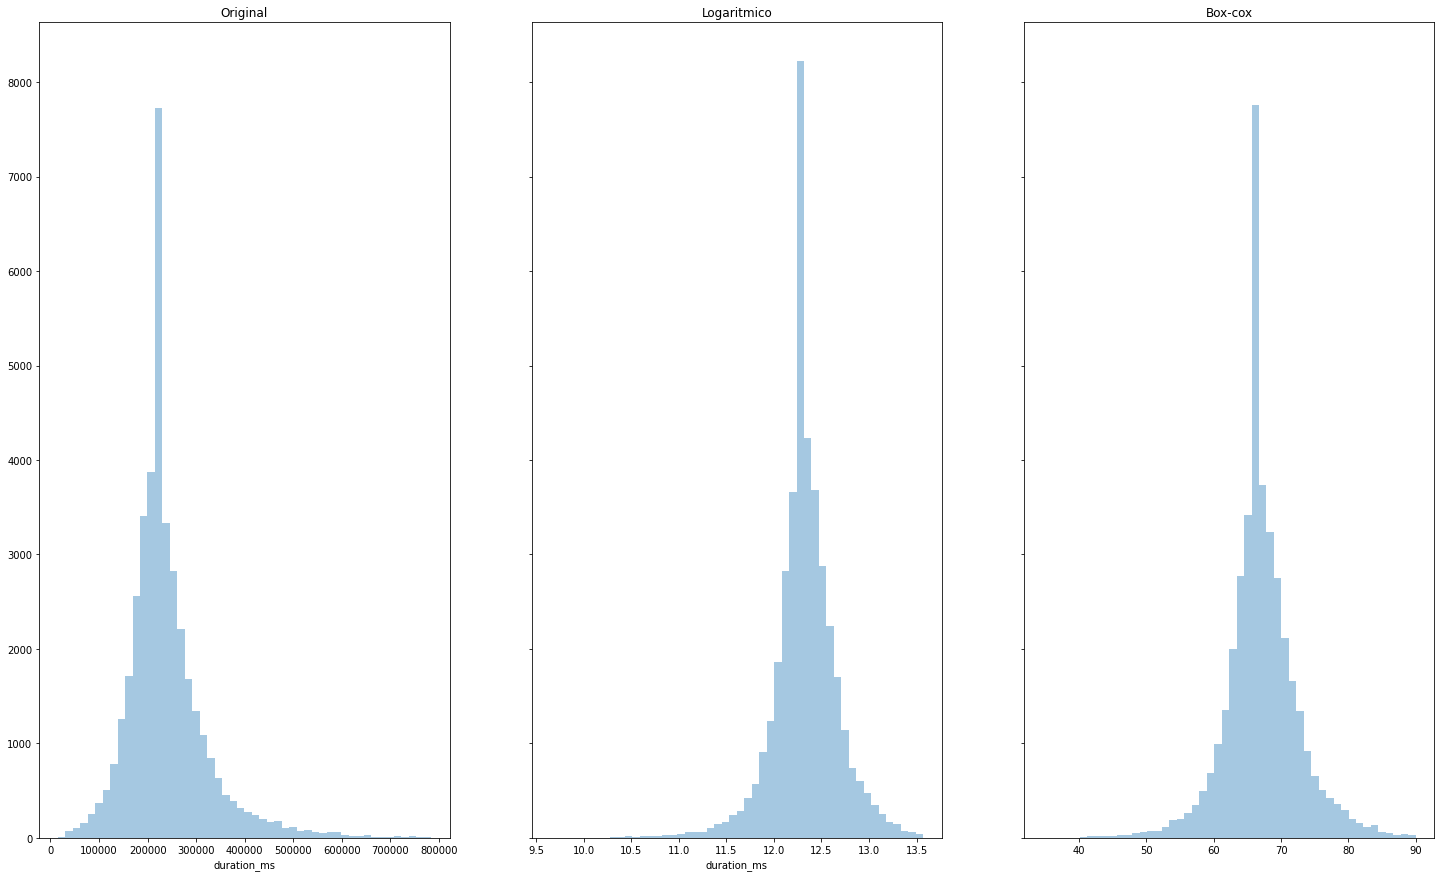

In [150]:
# Voy aplicarle varias transformaciones: logaritmica y Boxcox, para visualizar si mejora
from scipy import stats
fig, axes = plt.subplots(1, 3, figsize=(25,15), sharey=True)

# Original
sns.distplot(train_no_out_dura['duration_ms'], kde=False, ax=axes[0])
axes[0].set_title('Original')

# Logaritmic
sns.distplot(np.log(train_no_out_dura['duration_ms']), kde=False, ax=axes[1])
axes[1].set_title('Logaritmico')

# Box-cox
sns.distplot(stats.boxcox(train_no_out_dura['duration_ms'])[0], kde=False, ax=axes[2])
axes[2].set_title('Box-cox')


#### La original con la eliminación de outliers, ya es una distribución más centrada

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


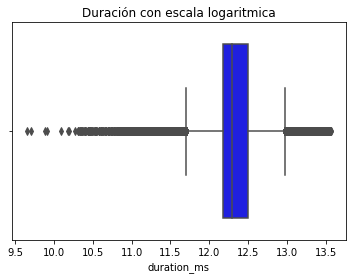

In [151]:
# Grafico de caja con bigotes con escala logaritmica
sns.boxplot(np.log(train_no_out_dura['duration_ms']), color= 'b')
plt.title('Duración con escala logaritmica');

#### Con la escala logaritmica se va demasiado hacia la derecha, así que de momento no voy a sustituirla

#### Me quedo con la distribución original sin los outliers

In [152]:
train_total= train_no_out_dura
train_total

,popularity,danceability,duration_ms,instrumentalness,key,liveness,loudness,mode,speechiness,valence,music_genre,tempo
30893,26.0,0.481,345253.0,0.000000,F,0.7190,-8.404,Minor,0.0388,0.3720,Blues,98.37200000000001
45278,21.0,0.242,480013.0,0.844000,D#,0.1130,-21.232,Major,0.0349,0.1170,Classical,80.195
16398,47.0,0.798,219960.0,0.002060,G,0.1820,-11.412,Major,0.0363,0.6770,Blues,81.018
13653,39.0,0.573,219019.0,0.000000,G,0.1520,-6.047,Minor,0.0374,0.6060,Country,141.91899999999998
13748,58.0,0.427,265640.0,0.810000,A,0.1690,-3.488,Major,0.0472,0.5390,Alternative,133.92600000000002
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,43.0,0.369,689520.0,0.000307,D,0.0403,-23.665,Major,0.0512,0.0375,Classical,135.674
44732,44.0,0.683,182000.0,0.000000,A#,0.3190,-5.861,Minor,0.0376,0.5570,Electronic,145.042
38158,42.0,0.302,395653.0,0.000007,D,0.1280,-4.719,Major,0.1830,0.4990,Alternative,172.946
860,40.0,0.246,443267.0,0.130000,F#,0.1470,-5.598,Minor,0.1670,0.3470,Jazz,94.17399999999999


In [153]:
train_total.shape

(39814, 12)

### 7.B. ZOOM y tratamiento columna 'mode'

In [154]:
# Visualizo en que 'modo' están dichos registros
train_total['mode'].value_counts()

Major    25609
Minor    14205
Name: mode, dtype: int64

#### Convierto columna de categórica a numérica con LabelEncoder

In [155]:
# Aplico Label encoding sobre 'mode'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_total['mode'] = le.fit_transform(train_total['mode'])


C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [156]:
train_total['mode'].value_counts()

0    25609
1    14205
Name: mode, dtype: int64

### 7.C. ZOOM y tratamiento columna 'instrumentalness'

In [157]:
train_total['instrumentalness'].value_counts()

0.000000    11929
0.891000       56
0.898000       55
0.912000       54
0.897000       53
            ...  
0.068600        1
0.000817        1
0.000007        1
0.070300        1
0.324000        1
Name: instrumentalness, Length: 4990, dtype: int64

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


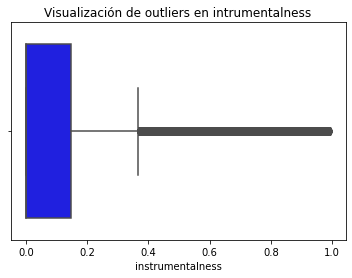

In [158]:
# Visualizo los outliers con un grafico de caja con bigotes
sns.boxplot(train_total['instrumentalness'], color = 'b')
plt.title('Visualización de outliers en intrumentalness');

In [159]:
# Visualizo los outliers en base a los Q1 y Q3 de instrumentalness
train_no_out_instru, ins_cortesuperior, ins_corteinferior = outliers_quantie(train_total, 'instrumentalness', 5.7)

print('\ntrain original tiene:', len(train_total), 'canciones')
print('train sin outliers tiene:', len(train_no_out_instru), 'canciones')
dif = len(train_total) - len(train_no_out_instru)
print('Diferencia:', dif)
print('Porcentaje sobre train:', round((dif/len(train_total))*100, 2),'%')

Límite corte inferior outliers: -0.8379
Límite corte superior outliers: 0.9849

Outliers Inferiores
0

Outliers Superiores
20
La duración minima del outlier: 0.98

train original tiene: 39814 canciones
train sin outliers tiene: 39794 canciones
Diferencia: 20
Porcentaje sobre train: 0.05 %


In [160]:
train_total['instrumentalness'].max()

0.994

In [161]:
train_total[train_total['instrumentalness'] >= ins_cortesuperior]

,popularity,danceability,duration_ms,instrumentalness,key,liveness,loudness,mode,speechiness,valence,music_genre,tempo
33386,15.0,0.285,38193.0,0.992,C,0.0933,-13.486,0,0.0423,0.2490,Anime,90.285
9858,40.0,0.160,149200.0,0.989,A#,0.0742,-28.318,0,0.0399,0.0341,Classical,?
44082,19.0,0.427,219019.0,0.987,C,0.3850,-13.728,0,0.0421,0.0381,Anime,67.146
5599,12.0,0.598,90600.0,0.993,F#,0.1470,-10.589,1,0.0473,0.7850,Anime,123.425
36317,13.0,0.204,137327.0,0.986,E,0.1160,-16.878,1,0.0364,0.0386,Anime,129.484
47998,26.0,0.179,144973.0,0.988,G,0.1140,-23.086,0,0.0386,0.0543,Anime,66.987
43272,17.0,0.219,44387.0,0.985,G#,0.2070,-11.224,0,0.0402,0.1710,Anime,99.639
29737,32.0,0.297,191054.0,0.985,D#,0.1250,-15.811,0,0.0371,0.1760,Jazz,105.77
5835,14.0,0.408,219019.0,0.992,G#,0.4260,-14.213,0,0.0359,0.9900,Anime,150.495
41332,20.0,0.212,319553.0,0.986,F#,0.0802,-11.749,0,0.0337,0.1520,Electronic,158.878


In [162]:
# Visualizo las canciones con un nivel de instrumentaless muy alto, es decir los outliers a que genero pertenecen
train_total[train_total['instrumentalness'] >= ins_cortesuperior].groupby('music_genre').aggregate({'instrumentalness': ['min', 'max', 'count']})

instrumentalness             
                         min    max count
music_genre                              
Anime                  0.985  0.993    12
Classical              0.986  0.994     6
Electronic             0.986  0.986     1
Jazz                   0.985  0.985     1

In [163]:
train_total[(train_total['instrumentalness'] < ins_cortesuperior) & (train_total['duration_ms'] < mili_cortesuperior)].groupby('music_genre').aggregate({'instrumentalness': ['count']})


,instrumentalness
,count
music_genre,
Alternative,3997
Anime,3992
Blues,3970
Classical,3896
Country,4014
Electronic,3977
Hip-Hop,3984
Jazz,3999


C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='instrumentalness'>

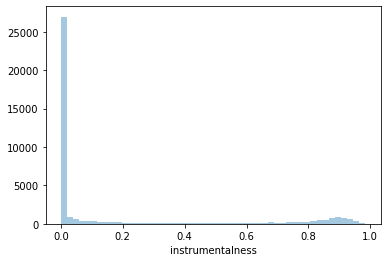

In [164]:
sns.distplot(train_no_out_instru['instrumentalness'], kde=False)

Su distribución sigue estando lejos de ser gaussiana

In [165]:
media_instru = train_total['instrumentalness'].mean()

In [166]:
train_no_out_instru =train_no_out_instru.replace(0.000000, media_instru)
train_no_out_instru['instrumentalness'].value_counts()

0.179818    11929
0.891000       56
0.898000       55
0.912000       54
0.897000       53
            ...  
0.096600        1
0.000008        1
0.000071        1
0.059900        1
0.324000        1
Name: instrumentalness, Length: 4982, dtype: int64

<AxesSubplot:xlabel='instrumentalness'>

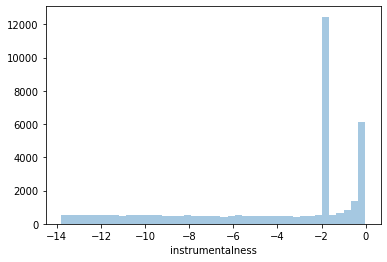

In [167]:
# Aplico transformacion logaritmica
sns.distplot(np.log(train_no_out_instru['instrumentalness']), kde=False)


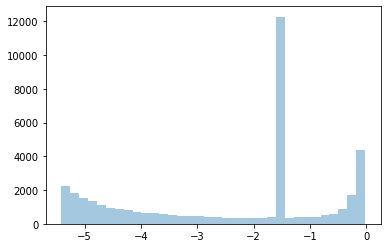

In [168]:
# Aplico transformacion  boxcox
sns.distplot(stats.boxcox(train_no_out_instru['instrumentalness'])[0], kde=False);

In [169]:
train_no_out_instru['instrumentalness'] = stats.boxcox(train_no_out_instru['instrumentalness'])[0]

In [170]:
train_total = train_no_out_instru

In [171]:
train_total

,popularity,danceability,duration_ms,instrumentalness,key,liveness,loudness,mode,speechiness,valence,music_genre,tempo
30893,26.0,0.481,345253.0,-1.493326,F,0.7190,-8.404,1.000000,0.0388,0.3720,Blues,98.37200000000001
45278,21.0,0.242,480013.0,-0.167240,D#,0.1130,-21.232,0.179818,0.0349,0.1170,Classical,80.195
16398,47.0,0.798,219960.0,-3.868285,G,0.1820,-11.412,0.179818,0.0363,0.6770,Blues,81.018
13653,39.0,0.573,219019.0,-1.493326,G,0.1520,-6.047,1.000000,0.0374,0.6060,Country,141.91899999999998
13748,58.0,0.427,265640.0,-0.207082,A,0.1690,-3.488,0.179818,0.0472,0.5390,Alternative,133.92600000000002
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,43.0,0.369,689520.0,-4.453690,D,0.0403,-23.665,0.179818,0.0512,0.0375,Classical,135.674
44732,44.0,0.683,182000.0,-1.493326,A#,0.3190,-5.861,1.000000,0.0376,0.5570,Electronic,145.042
38158,42.0,0.302,395653.0,-5.189563,D,0.1280,-4.719,0.179818,0.1830,0.4990,Alternative,172.946
860,40.0,0.246,443267.0,-1.730964,F#,0.1470,-5.598,1.000000,0.1670,0.3470,Jazz,94.17399999999999


### 7.D. ZOOM y tratamiento columna 'liveness'(si se grabaron o no en vivo)

In [172]:
train_total['liveness'].value_counts()

0.1100    500
0.1110    488
0.1080    471
0.1090    445
0.1120    433
         ... 
0.0209      1
0.0299      1
0.0232      1
0.8790      1
0.9130      1
Name: liveness, Length: 1610, dtype: int64

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


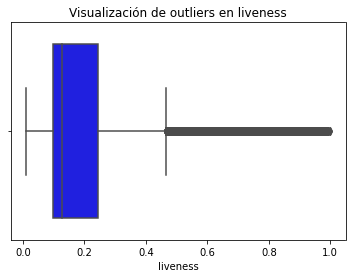

In [173]:
# Visualizo los outliers con un grafico de caja con bigotes
sns.boxplot(train_total['liveness'], color = 'b')
plt.title('Visualización de outliers en liveness');

In [174]:
# Visualizo los outliers en base a los Q1 y Q3 de liveness
train_no_out_live, live_cortesuperior, live_corteinferior = outliers_quantie(train_total, 'liveness', 5)

print('\ntrain original tiene:', len(train_total), 'canciones')
print('train sin outliers tiene:', len(train_no_out_live), 'canciones')
dif = len(train_total) - len(train_no_out_live)
print('Diferencia:', dif)
print('Porcentaje sobre train:', round((dif/len(train_total))*100, 2),'%')

Límite corte inferior outliers: -0.6392
Límite corte superior outliers: 0.98

Outliers Inferiores
0

Outliers Superiores
29
La duración minima del outlier: 0.98

train original tiene: 39794 canciones
train sin outliers tiene: 39765 canciones
Diferencia: 29
Porcentaje sobre train: 0.07 %


C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


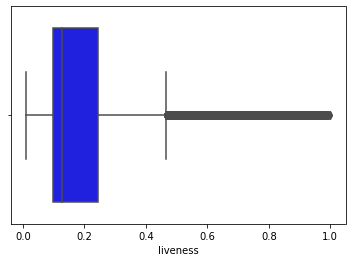

In [175]:
# Muestro grafico boxplot para ver como ha quedado quitando los outliers
sns.boxplot(train_no_out_dura['liveness'], color= 'b');

In [176]:
# Visualizo las canciones con un nivel de liveness muy alto, es decir los outliers a que genero pertenecen
train_total[train_total['liveness'] >= live_cortesuperior].groupby('music_genre').aggregate({'liveness': ['min', 'max', 'count']})

liveness             
                 min    max count
music_genre                      
Alternative    0.988  0.996     2
Blues          0.981  1.000    19
Classical      0.987  0.987     1
Country        0.982  0.986     3
Electronic     0.983  0.984     2
Rap            0.989  0.989     1
Rock           0.991  0.991     1

In [177]:
# Que proporcion de canciones agrupadas por genero me quedarian quitando los outliers de liveness
train_total[(train_total['instrumentalness'] < ins_cortesuperior) & (train_total['duration_ms'] < mili_cortesuperior) & (train_total['liveness'] < live_cortesuperior)].groupby('music_genre').aggregate({'liveness': ['count']})

,liveness
,count
music_genre,
Alternative,3995
Anime,3992
Blues,3951
Classical,3895
Country,4011
Electronic,3975
Hip-Hop,3984
Jazz,3999


#### **Quitando los outliers, todavia tengo una muestra suficientemente balanceada de todos los géneros musicales**

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


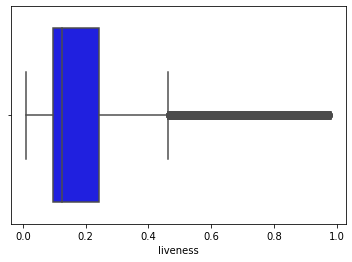

In [178]:
# Muestro grafico boxplot para ver como ha quedado quitando los outliers
sns.boxplot(train_no_out_live['liveness'], color= 'b');

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='liveness'>

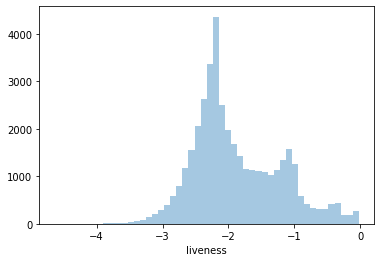

In [179]:
# Aplico transformacion logaritmica
sns.distplot(np.log(train_no_out_live['liveness']), kde=False)


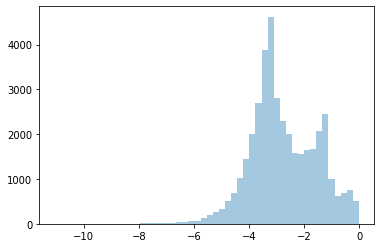

In [180]:
# Aplico transformacion  boxcox
sns.distplot(stats.boxcox(train_no_out_live['liveness'])[0], kde=False);

#### Me quedo con la transformación logaritmica que es la que tiene mejor distribución

In [181]:
train_no_out_live['liveness']= np.log(train_no_out_live['liveness'])

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [182]:
train_total = train_no_out_live
train_total.head()

,popularity,danceability,duration_ms,instrumentalness,key,liveness,loudness,mode,speechiness,valence,music_genre,tempo
30893,26.0,0.481,345253.0,-1.493326,F,-0.329894,-8.404,1.000000,0.0388,0.372,Blues,98.37200000000001
45278,21.0,0.242,480013.0,-0.167240,D#,-2.180367,-21.232,0.179818,0.0349,0.117,Classical,80.195
16398,47.0,0.798,219960.0,-3.868285,G,-1.703749,-11.412,0.179818,0.0363,0.677,Blues,81.018
13653,39.0,0.573,219019.0,-1.493326,G,-1.883875,-6.047,1.000000,0.0374,0.606,Country,141.91899999999998
13748,58.0,0.427,265640.0,-0.207082,A,-1.777857,-3.488,0.179818,0.0472,0.539,Alternative,133.92600000000002


In [183]:
train_total.shape

(39765, 12)

### 7.E. ZOOM y tratamiento columna 'key'

In [184]:
# Visualizo en que escalas están dichos registros
train_total['key'].value_counts()

G     4565
C     4416
C#    4334
D     4161
A     3826
F     3436
B     3042
E     2959
A#    2658
G#    2633
F#    2492
D#    1243
Name: key, dtype: int64

Escala musical
(Español - Inglés)

* DO --> C
* RE --> D
* MI --> E
* FA --> F
* SOL --> G
* LA --> A
* SI --> B

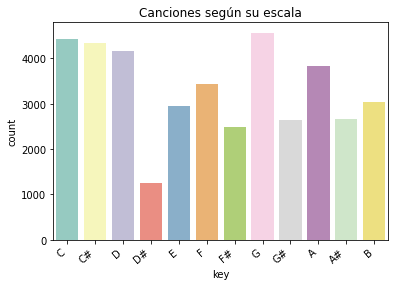

In [185]:
ax = sns.countplot(x= train_total["key"], order=["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"],palette="Set3")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");
plt.title("Canciones según su escala");

In [186]:
def esc_esp(x):
    x = x.lower()
    if x == 'c':
        x ='DO'
    elif x == 'c#':
        x ='DO#'
    elif x == 'd':
        x ='RE'
    elif x == 'd#':
        x ='RE#'
    elif x == 'e':
        x ='MI'
    elif x == 'f':
        x ='FA'
    elif x == 'f#':
        x ='FA#'
    elif x == 'g':
        x ='SOL'
    elif x == 'g#':
        x ='SOL#'
    elif x == 'a':
        x = 'LA'
    elif x == 'a#':
        x ='LA#'
    elif x == 'b':
        x = 'SI'
    return x

train_total['key'] = train_total['key'].apply(esc_esp)

train_total['key']

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


30893      FA
45278     RE#
16398     SOL
13653     SOL
13748      LA
         ... 
11284      RE
44732     LA#
38158      RE
860       FA#
15795    SOL#
Name: key, Length: 39765, dtype: object

In [187]:
train_total['key'].value_counts()

SOL     4565
DO      4416
DO#     4334
RE      4161
LA      3826
FA      3436
SI      3042
MI      2959
LA#     2658
SOL#    2633
FA#     2492
RE#     1243
Name: key, dtype: int64

In [188]:
# Hago un get_dummies para separar por columnas, eliminando la primera para evitar colinealidad
train_total = pd.get_dummies(train_total, columns = ['key'], drop_first = True)

train_total.head()

,popularity,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,valence,music_genre,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
30893,26.0,0.481,345253.0,-1.493326,-0.329894,-8.404,1.000000,0.0388,0.372,Blues,...,1,0,0,0,0,0,0,0,0,0
45278,21.0,0.242,480013.0,-0.167240,-2.180367,-21.232,0.179818,0.0349,0.117,Classical,...,0,0,0,0,0,0,1,0,0,0
16398,47.0,0.798,219960.0,-3.868285,-1.703749,-11.412,0.179818,0.0363,0.677,Blues,...,0,0,0,0,0,0,0,0,1,0
13653,39.0,0.573,219019.0,-1.493326,-1.883875,-6.047,1.000000,0.0374,0.606,Country,...,0,0,0,0,0,0,0,0,1,0
13748,58.0,0.427,265640.0,-0.207082,-1.777857,-3.488,0.179818,0.0472,0.539,Alternative,...,0,0,1,0,0,0,0,0,0,0


In [189]:
train_total.columns

Index(['popularity', 'danceability', 'duration_ms', 'instrumentalness',
       'liveness', 'loudness', 'mode', 'speechiness', 'valence', 'music_genre',
       'tempo', 'key_DO#', 'key_FA', 'key_FA#', 'key_LA', 'key_LA#', 'key_MI',
       'key_RE', 'key_RE#', 'key_SI', 'key_SOL', 'key_SOL#'],
      dtype='object')

### 7.F. ZOOM y tratamiento columna 'tempo'

##### Quiero dejar la columna tempo en el lugar que estaba originalmente

In [190]:
train_total = train_total[['popularity', 'danceability', 'duration_ms',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'valence', 'music_genre', 'key_DO#', 'key_FA', 'key_FA#',
       'key_LA', 'key_LA#', 'key_MI', 'key_RE', 'key_RE#', 'key_SI', 'key_SOL',
       'key_SOL#']]

In [191]:
train_total.columns

Index(['popularity', 'danceability', 'duration_ms', 'instrumentalness',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence',
       'music_genre', 'key_DO#', 'key_FA', 'key_FA#', 'key_LA', 'key_LA#',
       'key_MI', 'key_RE', 'key_RE#', 'key_SI', 'key_SOL', 'key_SOL#'],
      dtype='object')

In [192]:
# Veo que valores contiene 'tempo'
train_total['tempo'].value_counts()

?                     3937
140.007                 17
120.0                   14
100.00200000000001      14
100.00299999999999      13
                      ... 
184.007                  1
168.023                  1
119.90799999999999       1
92.10700000000001        1
94.17399999999999        1
Name: tempo, Length: 24888, dtype: int64

In [193]:
# Sustituyo '?' por tempo negativo, no posible
train_total['tempo'] = train_total['tempo'].str.replace('?', '-1.5')

train_total['tempo'].value_counts()

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


-1.5                  3937
140.007                 17
120.0                   14
100.00200000000001      14
100.00299999999999      13
                      ... 
184.007                  1
168.023                  1
119.90799999999999       1
92.10700000000001        1
94.17399999999999        1
Name: tempo, Length: 24888, dtype: int64

In [194]:
# Convierto variable 'tempo' a float
train_total['tempo'] = np.round(train_total['tempo'].astype(float), 2)
train_total['tempo'].value_counts()

-1.50      3937
 120.00      90
 100.00      81
 120.02      76
 140.00      73
           ... 
 196.22       1
 195.02       1
 71.90        1
 144.33       1
 156.73       1
Name: tempo, Length: 9960, dtype: int64

In [195]:
# Extraigo las canciones sin tempo que ahora valen -1.5
sin_tempo = train_total[(train_total['tempo']==-1.5)].index
train_contempo = train_total.drop(index = sin_tempo)

In [196]:
# Calculo la mediana del tempo
mediana_tempo = train_contempo['tempo'].median()
mediana_tempo

119.91

In [197]:
# A las canciones sin tempo les pongo el tempo obtenido como la mediana de train
train_total['tempo'] = train_total['tempo'].replace(-1.5, mediana_tempo)

train_total['tempo'].value_counts()


119.91    3944
120.00      90
100.00      81
120.02      76
140.00      73
          ... 
196.22       1
195.02       1
71.90        1
144.33       1
156.73       1
Name: tempo, Length: 9959, dtype: int64

In [198]:
train_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39765 entries, 30893 to 15795
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        39765 non-null  float64
 1   danceability      39765 non-null  float64
 2   duration_ms       39765 non-null  float64
 3   instrumentalness  39765 non-null  float64
 4   liveness          39765 non-null  float64
 5   loudness          39765 non-null  float64
 6   mode              39765 non-null  float64
 7   speechiness       39765 non-null  float64
 8   tempo             39765 non-null  float64
 9   valence           39765 non-null  float64
 10  music_genre       39765 non-null  object 
 11  key_DO#           39765 non-null  uint8  
 12  key_FA            39765 non-null  uint8  
 13  key_FA#           39765 non-null  uint8  
 14  key_LA            39765 non-null  uint8  
 15  key_LA#           39765 non-null  uint8  
 16  key_MI            39765 non-null  ui

### 7.G. ZOOM y tratamiento columna 'loudness'

In [199]:
train_total['loudness'].value_counts()

-5.443     16
-5.587     15
-5.013     14
-5.381     14
-5.698     14
           ..
 0.713      1
-14.299     1
-12.089     1
-16.580     1
-23.665     1
Name: loudness, Length: 15612, dtype: int64

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


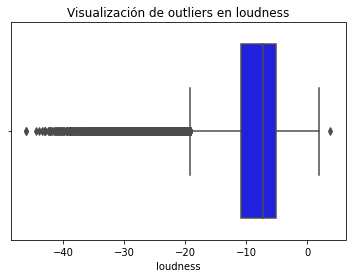

In [200]:
# Visualizo los outliers con un grafico de caja con bigotes
sns.boxplot(train_total['loudness'], color = 'b')
plt.title('Visualización de outliers en loudness');

In [201]:
# Visualizo los outliers en base a los Q1 y Q3 de loudness
train_no_out_loud, loud_cortesuperior, loud_corteinferior = outliers_quantie(train_total, 'loudness', 5)

print('\ntrain original tiene:', len(train_total), 'canciones')
print('train sin outliers tiene:', len(train_no_out_loud), 'canciones')
dif = len(train_total) - len(train_no_out_loud)
print('Diferencia:', dif)
print('Porcentaje sobre train:', round((dif/len(train_total))*100, 2),'%')

Límite corte inferior outliers: -39.004999999999995
Límite corte superior outliers: 23.035

Outliers Inferiores
46

Outliers Superiores
0
La duración minima del outlier: nan

train original tiene: 39765 canciones
train sin outliers tiene: 39719 canciones
Diferencia: 46
Porcentaje sobre train: 0.12 %


C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


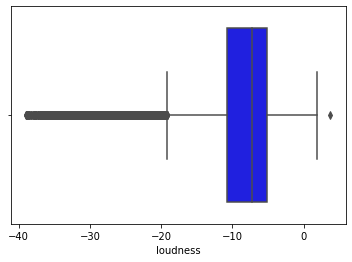

In [202]:
# Muestro grafico boxplot para ver como ha quedado quitando los outliers
sns.boxplot(train_no_out_loud['loudness'], color= 'b');

In [203]:
# Visualizo las canciones con un nivel de loudness muy alto, es decir los outliers a que genero pertenecen
train_total[train_total['loudness'] <= loud_corteinferior].groupby('music_genre').aggregate({'loudness': ['min', 'max', 'count']})

loudness              
                 min     max count
music_genre                       
Anime        -41.234 -39.194     3
Classical    -46.122 -39.064    43

In [204]:
# Que proporcion de canciones agrupadas por genero me quedarian quitando los outliers de loudness
train_total[(train_total['instrumentalness'] < ins_cortesuperior) & (train_total['duration_ms'] < mili_cortesuperior) & (train_total['liveness'] < live_cortesuperior) & (train_total['loudness'] > loud_corteinferior)].groupby('music_genre').aggregate({'loudness': ['count']})

,loudness
,count
music_genre,
Alternative,3995
Anime,3989
Blues,3951
Classical,3852
Country,4011
Electronic,3975
Hip-Hop,3984
Jazz,3999


#### **Quitando los outliers, todavia tengo una muestra suficientemente balanceada de todos los géneros musicales**

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


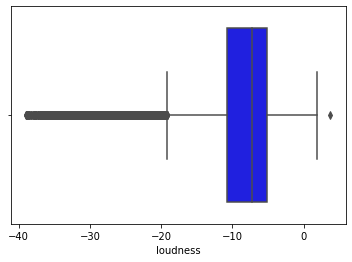

In [205]:
# Muestro grafico boxplot para ver como ha quedado quitando los outliers
sns.boxplot(train_no_out_loud['loudness'], color= 'b');

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loudness'>

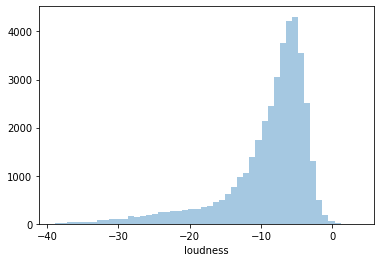

In [206]:
# Aplico transformacion logaritmica
sns.distplot(train_no_out_loud['loudness'], kde=False)

In [207]:
train_total = train_no_out_loud
train_total.head()

,popularity,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
30893,26.0,0.481,345253.0,-1.493326,-0.329894,-8.404,1.000000,0.0388,98.37,0.372,...,1,0,0,0,0,0,0,0,0,0
45278,21.0,0.242,480013.0,-0.167240,-2.180367,-21.232,0.179818,0.0349,80.19,0.117,...,0,0,0,0,0,0,1,0,0,0
16398,47.0,0.798,219960.0,-3.868285,-1.703749,-11.412,0.179818,0.0363,81.02,0.677,...,0,0,0,0,0,0,0,0,1,0
13653,39.0,0.573,219019.0,-1.493326,-1.883875,-6.047,1.000000,0.0374,141.92,0.606,...,0,0,0,0,0,0,0,0,1,0
13748,58.0,0.427,265640.0,-0.207082,-1.777857,-3.488,0.179818,0.0472,133.93,0.539,...,0,0,1,0,0,0,0,0,0,0


In [208]:
train_total.shape

(39719, 22)

In [209]:
train_total.columns

Index(['popularity', 'danceability', 'duration_ms', 'instrumentalness',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence',
       'music_genre', 'key_DO#', 'key_FA', 'key_FA#', 'key_LA', 'key_LA#',
       'key_MI', 'key_RE', 'key_RE#', 'key_SI', 'key_SOL', 'key_SOL#'],
      dtype='object')

## 8. Visualizaciones de Features vs Target en TRAIN

### 8.A.Popularity

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


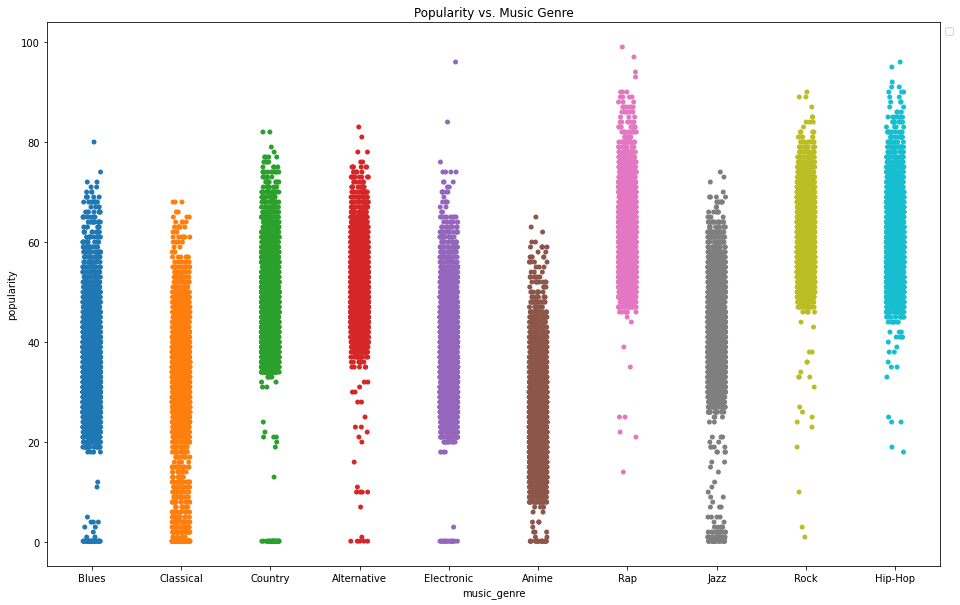

In [210]:
# Gráfico enjambre
plt.figure(figsize=(16,10))
ax = sns.stripplot(x="music_genre", y="popularity", data=train_total)

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title("Popularity vs. Music Genre");

### 8.C. Danceability

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


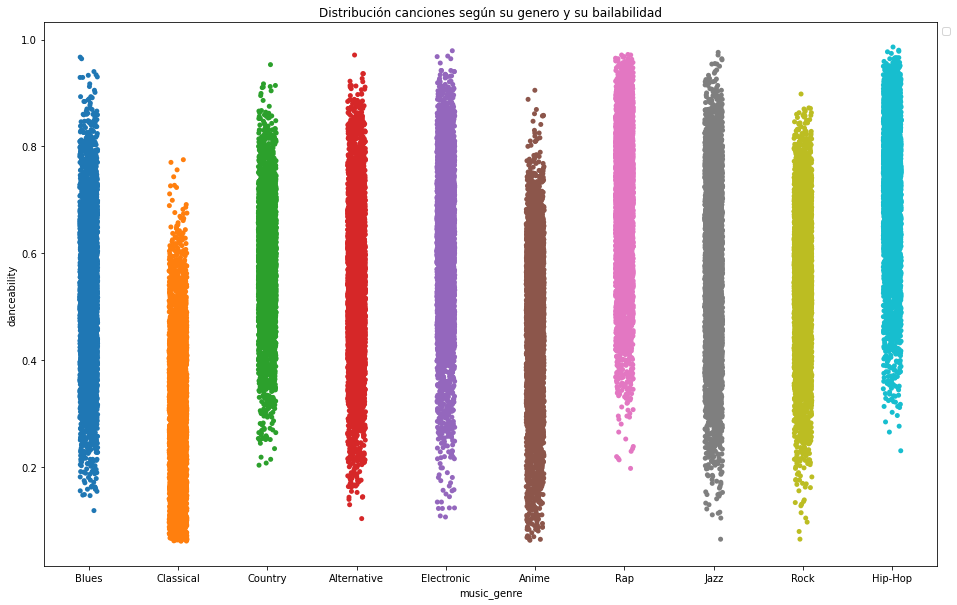

In [211]:
# Gráfico enjambre
plt.figure(figsize=(16,10))
ax = sns.stripplot(x="music_genre", y="danceability", data=train_total)

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title("Distribución canciones según su genero y su bailabilidad");

### 8.D. Duration

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


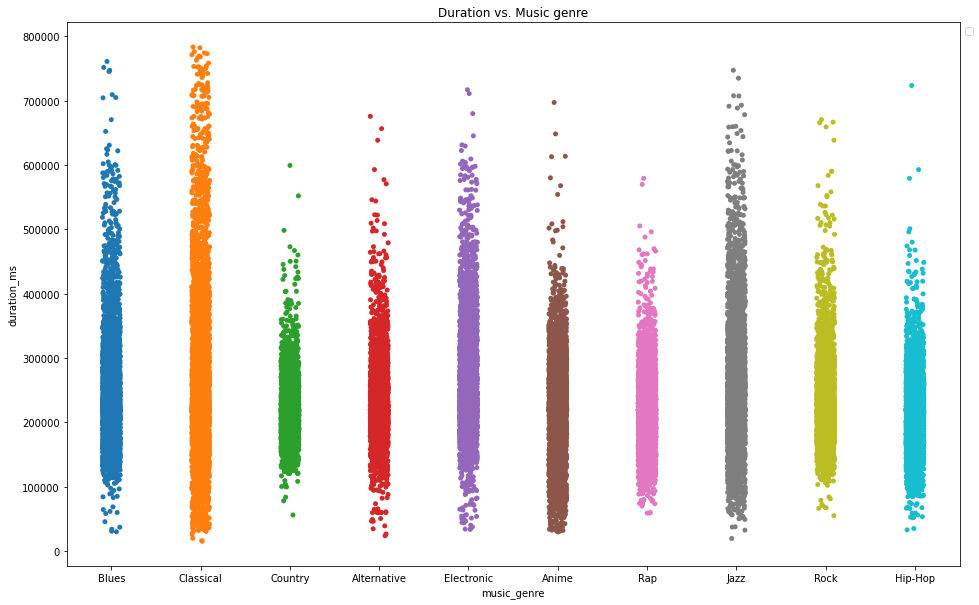

In [212]:
# Gráfico enjambre
plt.figure(figsize=(16,10))
ax = sns.stripplot(x="music_genre", y="duration_ms", data=train_total)

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title("Duration vs. Music genre");

### 8.F. Instrumentalness

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


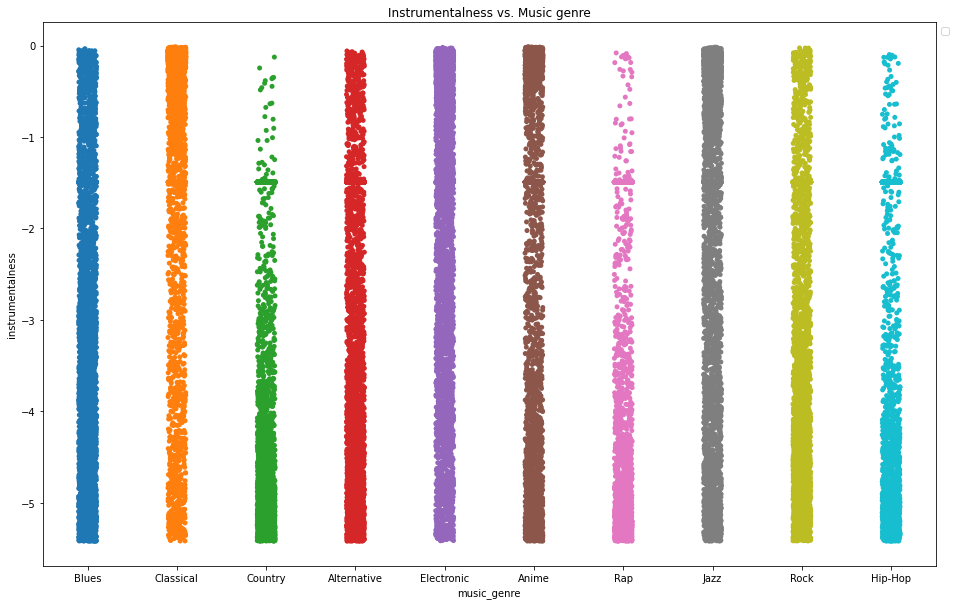

In [213]:
# Gráfico enjambre
plt.figure(figsize=(16,10))
ax = sns.stripplot(x="music_genre", y="instrumentalness", data=train_total)

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title("Instrumentalness vs. Music genre");

### 8.G. Liveness

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


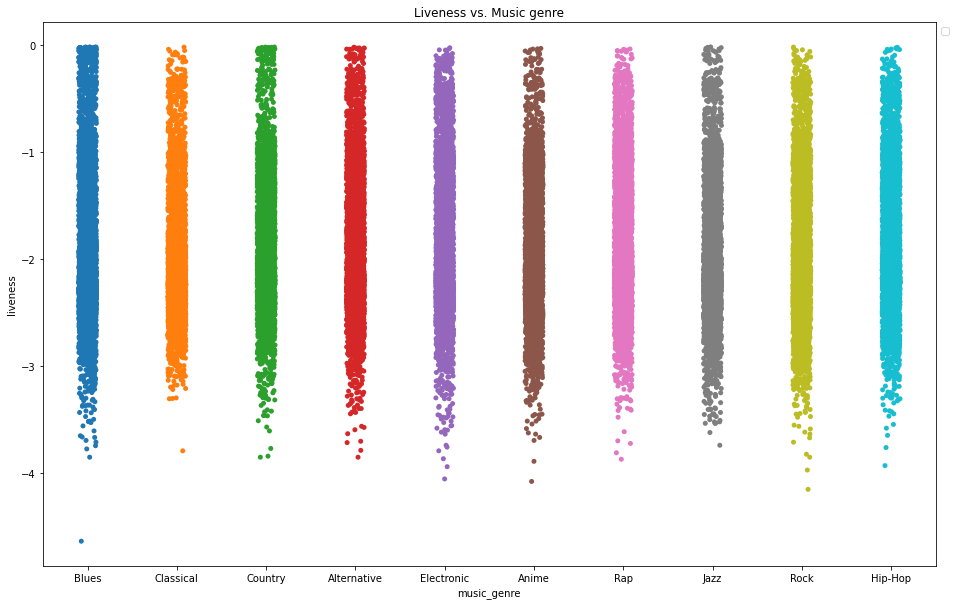

In [214]:
# Gráfico enjambre
plt.figure(figsize=(16,10))
ax = sns.stripplot(x="music_genre", y="liveness", data=train_total)

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title("Liveness vs. Music genre");

### 8.H. Loudness

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


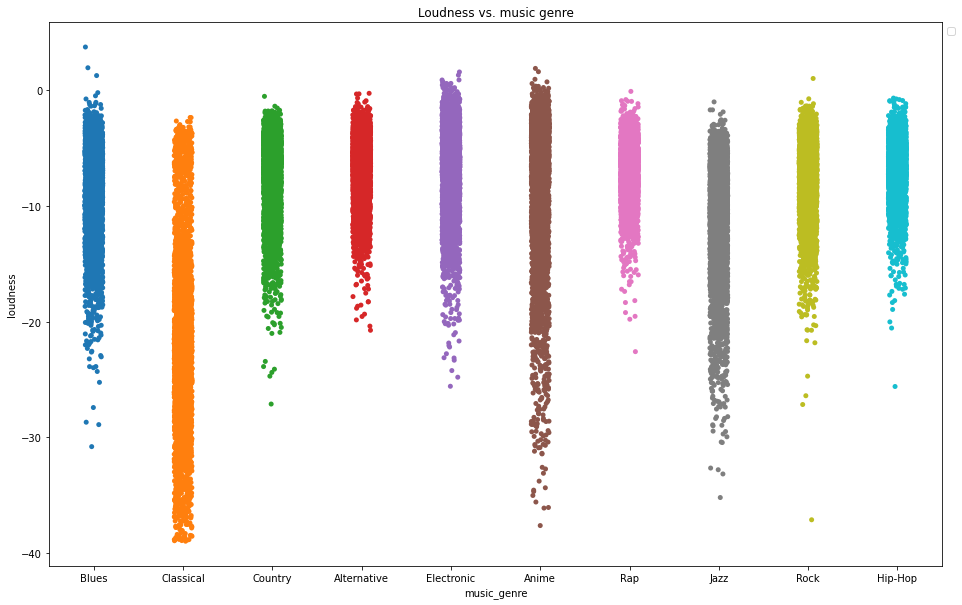

In [215]:
# Gráfico enjambre
plt.figure(figsize=(16,10))
ax = sns.stripplot(x="music_genre", y="loudness", data=train_total)

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title("Loudness vs. music genre");

### 8.I. Tempo

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


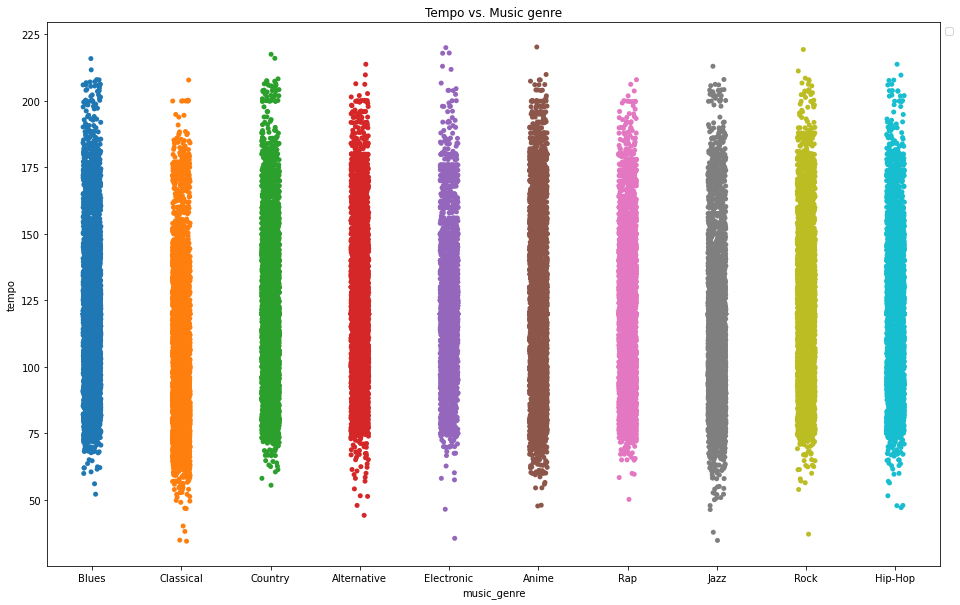

In [216]:
# Gráfico enjambre
plt.figure(figsize=(16,10))
ax = sns.stripplot(x="music_genre", y="tempo", data=train_total)

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title("Tempo vs. Music genre");

### 8.J. Speechiness

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


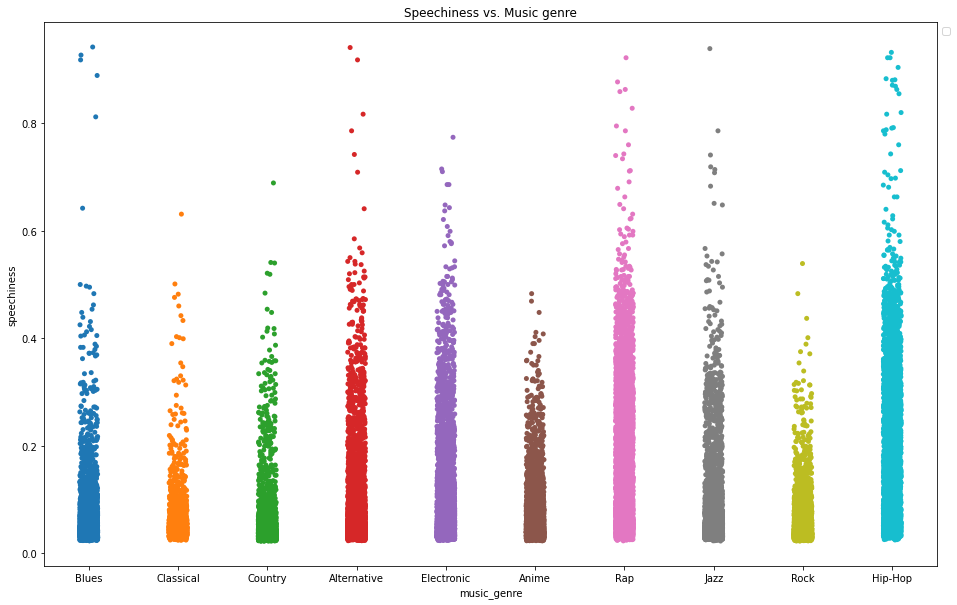

In [217]:
# Gráfico enjambre
plt.figure(figsize=(16,10))
ax = sns.stripplot(x="music_genre", y="speechiness", data=train_total)

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.title("Speechiness vs. Music genre");

## 8.1. > Guardo CSV X_train modificado

In [218]:
X_train = train_total.drop('music_genre', axis=1)
X_train.head()

,popularity,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
30893,26.0,0.481,345253.0,-1.493326,-0.329894,-8.404,1.000000,0.0388,98.37,0.372,...,1,0,0,0,0,0,0,0,0,0
45278,21.0,0.242,480013.0,-0.167240,-2.180367,-21.232,0.179818,0.0349,80.19,0.117,...,0,0,0,0,0,0,1,0,0,0
16398,47.0,0.798,219960.0,-3.868285,-1.703749,-11.412,0.179818,0.0363,81.02,0.677,...,0,0,0,0,0,0,0,0,1,0
13653,39.0,0.573,219019.0,-1.493326,-1.883875,-6.047,1.000000,0.0374,141.92,0.606,...,0,0,0,0,0,0,0,0,1,0
13748,58.0,0.427,265640.0,-0.207082,-1.777857,-3.488,0.179818,0.0472,133.93,0.539,...,0,0,1,0,0,0,0,0,0,0


In [219]:
X_train.to_csv('csvs/X_train_modified_noAcousticEnergy.csv')

In [220]:
# Compruebo que esta bien guardado, volviendo a traerlo y leerlo
X_train = pd.read_csv('csvs/X_train_modified_noAcousticEnergy.csv')
X_train.head(10)


,Unnamed: 0,popularity,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,tempo,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
0,30893,26.0,0.481,345253.0,-1.493326,-0.329894,-8.404,1.000000,0.0388,98.37,...,1,0,0,0,0,0,0,0,0,0
1,45278,21.0,0.242,480013.0,-0.167240,-2.180367,-21.232,0.179818,0.0349,80.19,...,0,0,0,0,0,0,1,0,0,0
2,16398,47.0,0.798,219960.0,-3.868285,-1.703749,-11.412,0.179818,0.0363,81.02,...,0,0,0,0,0,0,0,0,1,0
3,13653,39.0,0.573,219019.0,-1.493326,-1.883875,-6.047,1.000000,0.0374,141.92,...,0,0,0,0,0,0,0,0,1,0
4,13748,58.0,0.427,265640.0,-0.207082,-1.777857,-3.488,0.179818,0.0472,133.93,...,0,0,1,0,0,0,0,0,0,0
5,23965,29.0,0.410,225093.0,-2.062738,-1.164752,-2.381,1.000000,0.1410,148.11,...,0,0,0,0,0,0,0,1,0,0
6,45552,30.0,0.624,251000.0,-4.371529,-2.154165,-7.900,0.179818,0.0313,125.10,...,0,0,0,0,0,0,0,0,0,0
7,30219,28.0,0.481,202707.0,-1.493326,-1.111698,-4.094,0.179818,0.0509,119.91,...,0,0,0,0,0,0,0,0,0,0
8,24079,57.0,0.921,234787.0,-1.493326,-2.566551,-9.200,1.000000,0.0823,120.04,...,0,0,0,0,0,0,0,0,0,0
9,12181,52.0,0.497,230513.0,-5.387271,-1.754464,-4.383,1.000000,0.0445,96.50,...,0,0,0,0,0,0,0,0,1,0


In [221]:
X_train.shape

(39719, 22)

In [222]:
X_train.columns

Index(['Unnamed: 0', 'popularity', 'danceability', 'duration_ms',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'valence', 'key_DO#', 'key_FA', 'key_FA#', 'key_LA', 'key_LA#',
       'key_MI', 'key_RE', 'key_RE#', 'key_SI', 'key_SOL', 'key_SOL#'],
      dtype='object')

In [223]:
X_train.drop(columns=['Unnamed: 0'], inplace=True)

## 9. TRATAMIENTO y_train , MI COLUMNA TARGET

In [224]:
y_train = train_total.iloc[:,10]

In [225]:
y_train

30893          Blues
45278      Classical
16398          Blues
13653        Country
13748    Alternative
            ...     
11284      Classical
44732     Electronic
38158    Alternative
860             Jazz
15795     Electronic
Name: music_genre, Length: 39719, dtype: object

In [226]:
y_train.shape

(39719,)

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


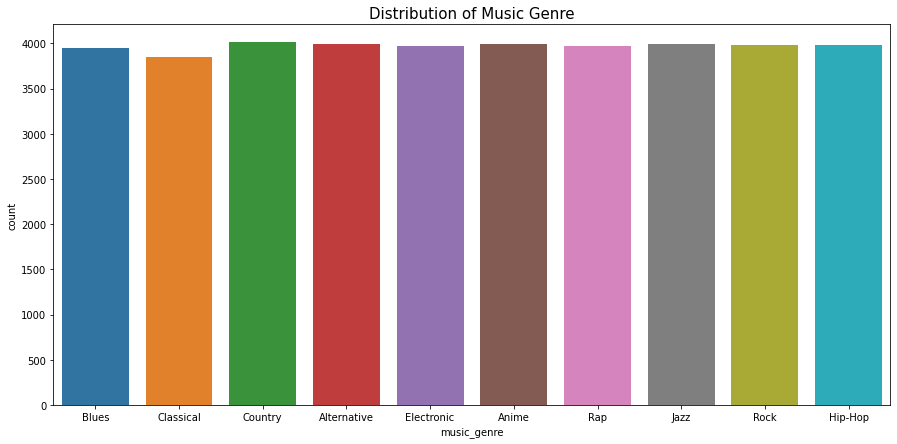

In [227]:
plt.figure(figsize=(15,7))
sns.countplot(y_train)
plt.title("Distribution of Music Genre",{'fontsize':15});


In [228]:
generos = y_train.value_counts()
generos

Country        4011
Jazz           3999
Alternative    3995
Anime          3989
Rock           3987
Hip-Hop        3984
Rap            3976
Electronic     3975
Blues          3951
Classical      3852
Name: music_genre, dtype: int64

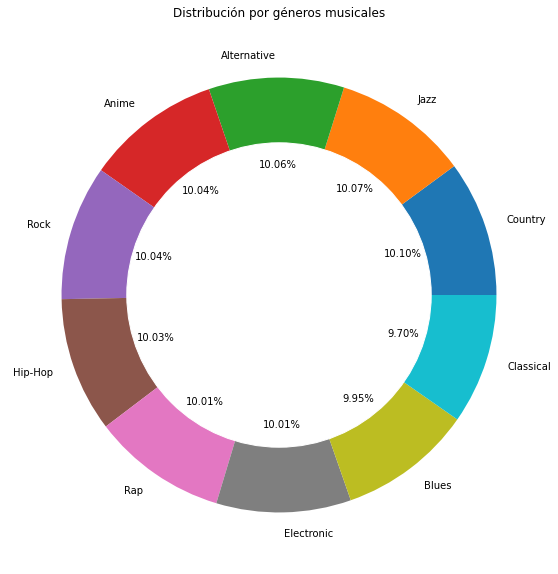

In [229]:
# Visualizo en un roscón que los generos está bien balanceados tras el feature engineering
plt.figure(figsize=(10,10))
plt.pie(generos.values,
        labels = generos.index,
        autopct='%1.2f%%')
        
my_circle=plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf() # figura
p.gca().add_artist(my_circle) # axes de la figura
plt.title('Distribución por géneros musicales');

#### Convierto el TARGET a columna numérica con LabelEncoder

In [230]:
y_train.value_counts()

Country        4011
Jazz           3999
Alternative    3995
Anime          3989
Rock           3987
Hip-Hop        3984
Rap            3976
Electronic     3975
Blues          3951
Classical      3852
Name: music_genre, dtype: int64

In [231]:
y_train = le.fit_transform(y_train)

In [232]:
y_train = pd.Series(y_train, name= 'music_genre')
y_train.value_counts()

4    4011
7    3999
0    3995
1    3989
9    3987
6    3984
8    3976
5    3975
2    3951
3    3852
Name: music_genre, dtype: int64

In [233]:
generos_musicales = {'Alternative': 0, 'Anime': 1, 'Blues': 2, 'Classical': 3, 'Country': 4, 'Electronic': 5, 'Hip-Hop': 6, 'Jazz': 7, 'Rap': 8, 'Rock': 9}


## 9.1. > Guardo CSV de y_train modificado

In [234]:
y_train.to_csv("csvs/y_train_transformed_noAcousticEnergy.csv", index = False)

In [235]:
y_train = pd.read_csv('csvs/y_train_transformed_noAcousticEnergy.csv')
y_train.head(10)

,music_genre
0,2
1,3
2,2
3,4
4,0
5,2
6,5
7,1
8,0
9,0


In [236]:
#y_test.drop(columns=['Unnamed: 0'], inplace=True)

## 10. ESTANDARIZACIÓN X_train

In [237]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)

In [238]:
X_train_scal = pd.DataFrame(X_train_scal,
                       index=X_train.index,
                       columns=X_train.columns)

X_train_scal.head(5)

,popularity,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
0,-1.181905,-0.443239,1.288685,0.525620,2.361115,0.109311,1.342698,-0.541965,-0.746923,-0.348067,...,3.252154,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
1,-1.504704,-1.789203,2.919348,1.271448,-0.442565,-2.003693,-0.744769,-0.580440,-1.373654,-1.383412,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,5.568271,-0.287891,-0.360134,-0.266344
2,0.173848,1.341994,-0.227422,-0.810123,0.279567,-0.386161,-0.744769,-0.566629,-1.345041,0.890287,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344
3,-0.342630,0.074873,-0.238809,0.525620,0.006656,0.497551,1.342698,-0.555777,0.754407,0.602014,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344
4,0.884005,-0.747348,0.325328,1.249039,0.167285,0.919065,-0.744769,-0.459096,0.478962,0.329982,...,-0.307488,-0.258507,3.066002,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344


In [239]:
X_train_scal.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,39719.0,-2.250466e-16,1.000013,-2.848848,-0.665428,0.044729,0.754885,3.530952
danceability,39719.0,4.168193e-17,1.000013,-2.810221,-0.651610,0.057978,0.722513,2.400744
duration_ms,39719.0,1.177112e-16,1.000013,-2.701381,-0.536070,-0.238809,0.344489,6.589998
instrumentalness,39719.0,2.148498e-16,1.000013,-1.683272,-1.042375,0.525620,0.525620,1.356449
liveness,39719.0,3.363177e-16,1.000013,-4.167262,-0.677015,-0.277578,0.717519,2.830333
loudness,39719.0,-1.604665e-16,1.000013,-4.926122,-0.282801,0.301701,0.643162,2.110306
mode,39719.0,1.016109e-16,1.000013,-0.744769,-0.744769,-0.744769,1.342698,1.342698
speechiness,39719.0,1.279081e-17,1.000013,-0.704744,-0.568602,-0.441339,0.051929,8.368426
tempo,39719.0,-5.475896e-16,1.000013,-2.949792,-0.794841,-0.004359,0.677875,3.455766
valence,39719.0,-2.751365e-16,1.000013,-1.760602,-0.802807,-0.035433,0.776602,2.169242


In [240]:
print(X_train.shape)
print(X_train_scal.shape)
print(y_train.shape)

(39719, 21)
(39719, 21)
(39719, 1)


## 11. Visualización features X_train estandarizadas

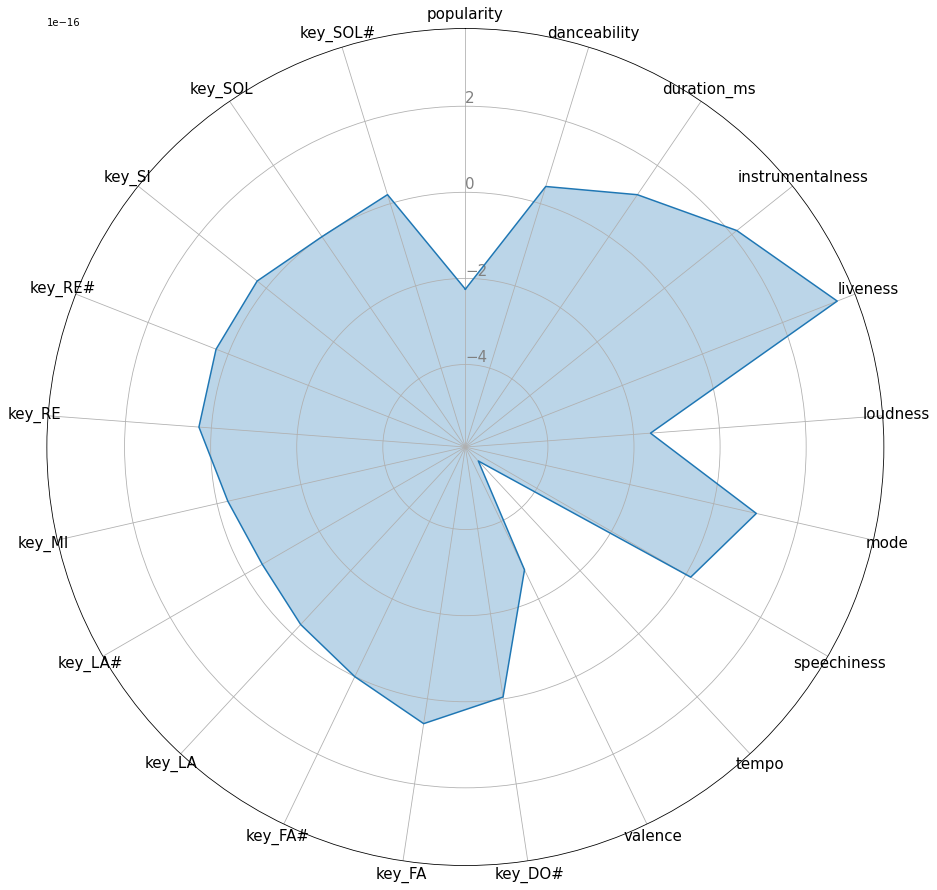

In [241]:
import matplotlib.pyplot as plt
import numpy as np
# plot size
fig=plt.figure(figsize=(15,18))

categories=list(X_train_scal.columns)
N=len(categories)
value=list(X_train_scal.mean())
value+=value[:1]
angles=[n/float(N)*2*(np.pi) for n in range(N)]
angles+=angles[:1]


plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)
ax = plt.subplot(111, polar=True)
# Comienza radar chart arriba y hacia la derecha las variables
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()

## 11.1. > Guardo X_train modificado y estandarizado


In [242]:
X_train_scal.to_csv("csvs/X_train_modified_and_scaled_noAcousticEnergy.csv")

In [243]:
X_train_scal = pd.read_csv('csvs/X_train_modified_and_scaled_noAcousticEnergy.csv')
X_train_scal.head(10)

,Unnamed: 0,popularity,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,tempo,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
0,0,-1.181905,-0.443239,1.288685,0.525620,2.361115,0.109311,1.342698,-0.541965,-0.746923,...,3.252154,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
1,1,-1.504704,-1.789203,2.919348,1.271448,-0.442565,-2.003693,-0.744769,-0.580440,-1.373654,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,5.568271,-0.287891,-0.360134,-0.266344
2,2,0.173848,1.341994,-0.227422,-0.810123,0.279567,-0.386161,-0.744769,-0.566629,-1.345041,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344
3,3,-0.342630,0.074873,-0.238809,0.525620,0.006656,0.497551,1.342698,-0.555777,0.754407,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344
4,4,0.884005,-0.747348,0.325328,1.249039,0.167285,0.919065,-0.744769,-0.459096,0.478962,...,-0.307488,-0.258507,3.066002,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
5,5,-0.988226,-0.843086,-0.165311,0.205367,1.096209,1.101408,1.342698,0.466274,0.967799,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,3.473537,-0.360134,-0.266344
6,6,-0.923667,0.362087,0.148177,-1.093161,-0.402865,0.192329,-0.744769,-0.615956,0.174559,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
7,7,-1.052786,-0.443239,-0.436192,0.525620,1.176593,0.819246,-0.744769,-0.422594,-0.004359,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
8,8,0.819445,2.034687,-0.048008,0.525620,-1.027677,-0.021805,1.342698,-0.112822,0.000122,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
9,9,0.496646,-0.353132,-0.099726,-1.664443,0.202728,0.771642,1.342698,-0.485733,-0.811388,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344


In [244]:
X_train_scal.drop(columns=['Unnamed: 0'], inplace=True)

### Visualizo la distribución de las features escaladas

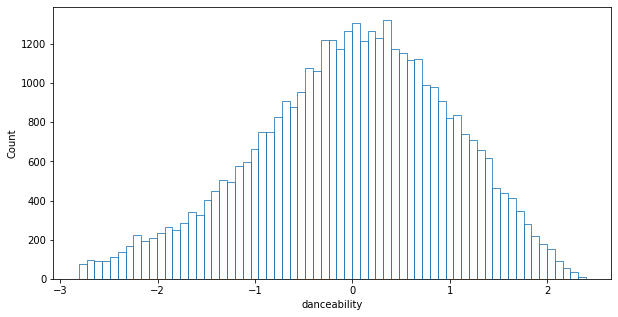

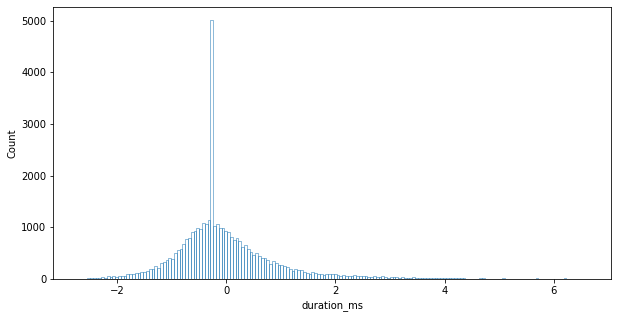

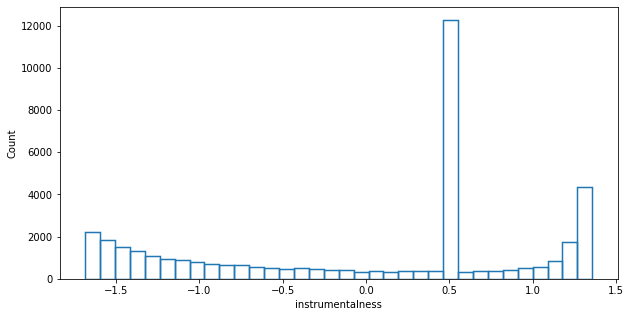

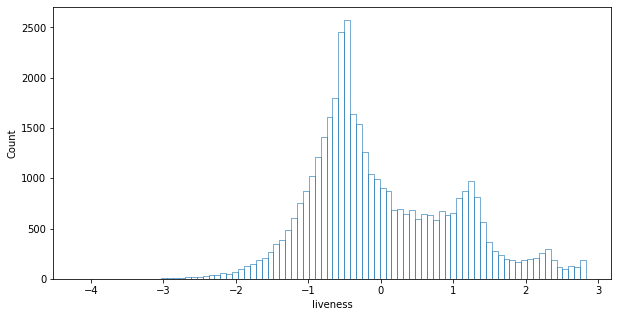

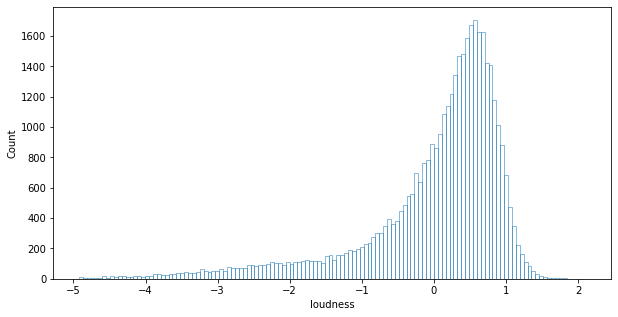

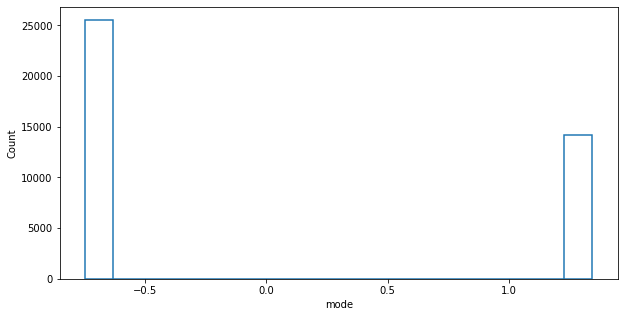

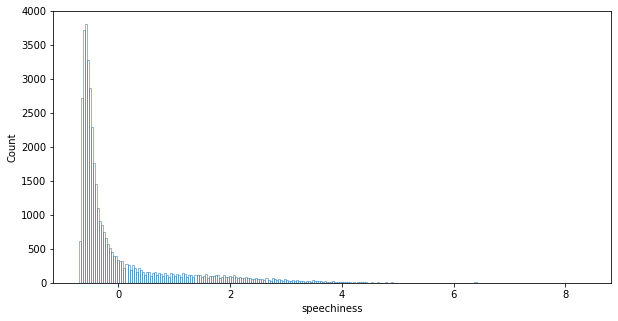

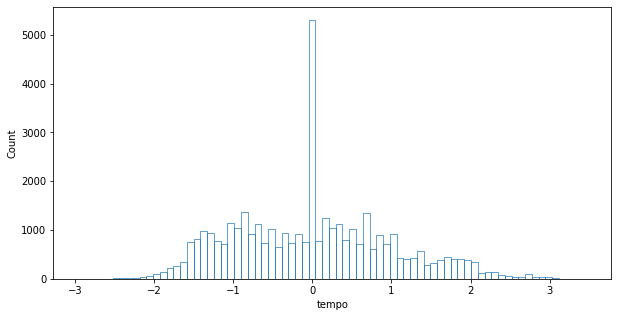

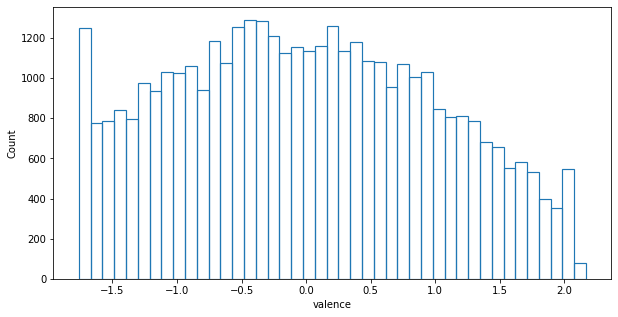

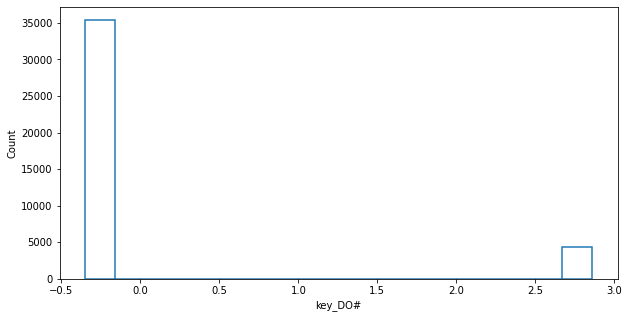

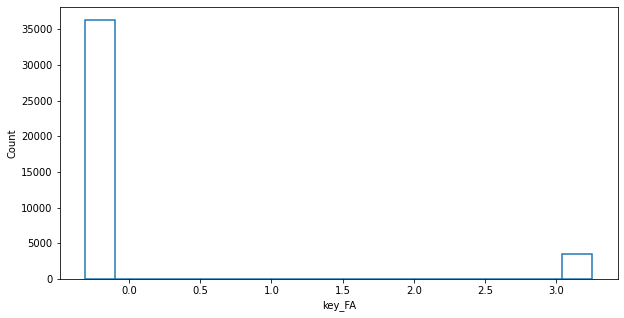

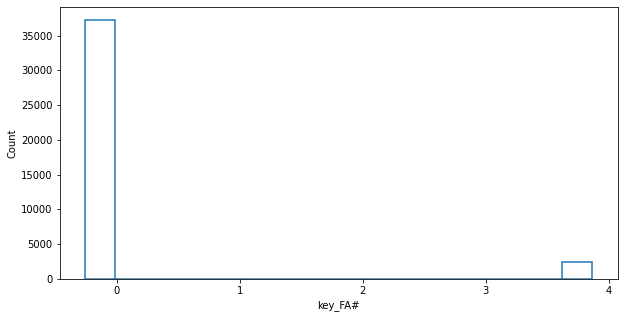

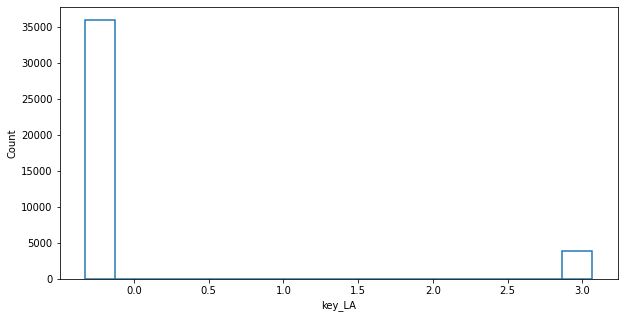

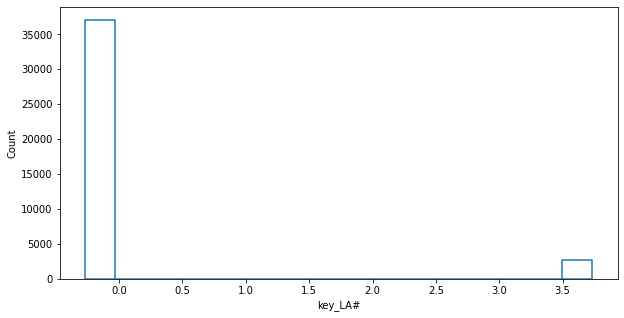

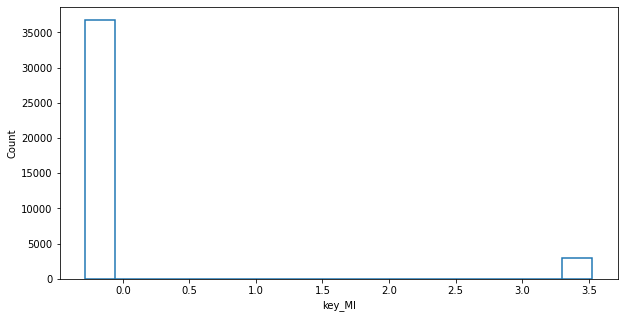

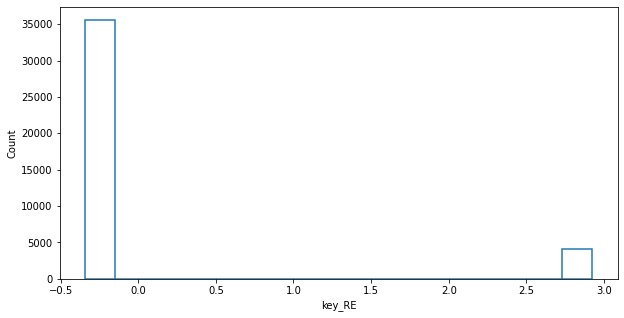

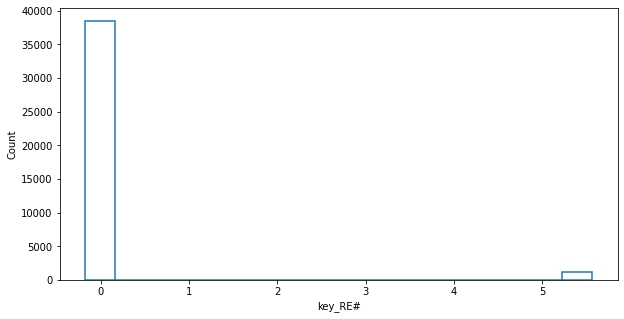

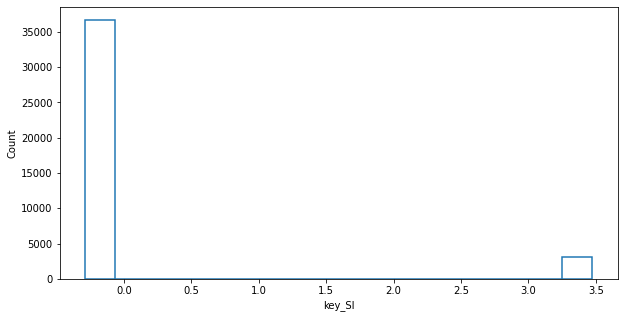

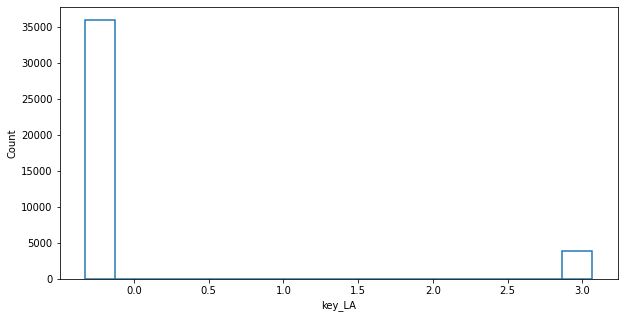

In [245]:
# Quiero ver graficamente sus distribuciones
for column in X_train_scal.columns[1:-2]:
    plt.figure(figsize=[10,5])
    sns.histplot(X_train_scal[column], fill=False)
for column in X_train_scal.columns[13:14]:
    plt.figure(figsize=[10,5])
    sns.histplot(X_train_scal[column], fill=False)

## --->> MILESTONE: Train ya está tratado y preparado para aplicarle modelos

Los modelos se desarrollan en otro notebook, PARTE II.

Sin embargo, a continuación hago el tratamiento de mis datos de TEST para tenerlos preparados y en los modelos poder comparar resultados obtenidos en TRAIN con los datos de TEST.

## 12. DATA CLEANING & FEATURE ENGINEERING: sobre TEST (igual que tratamiento en train)

In [246]:
test_total = pd.concat([X_test, y_test], axis=1)
test_total

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
33553,Scott Hamilton,60.0,0.91500,0.487,-1.0,0.135,0.003530,D,0.686,-11.211,Minor,0.0434,105.854,0.240,Jazz
9427,Queens of the Stone Age,33.0,0.01690,0.483,158067.0,0.903,0.053400,C,0.115,-5.767,Minor,0.0738,159.775,0.737,Blues
199,Makaya McCraven,36.0,0.63800,0.396,314800.0,0.380,0.836000,E,0.111,-12.908,Minor,0.0429,150.013,0.618,Jazz
12447,The Rolling Stones,63.0,0.83400,0.518,196493.0,0.543,0.000000,C,0.200,-10.766,Major,0.0297,104.52799999999999,0.579,Rock
39489,Kodak Black,72.0,0.09960,0.715,130929.0,0.617,0.000003,B,0.186,-5.558,Minor,0.2400,176.11700000000002,0.283,Hip-Hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28567,Dillon Francis,33.0,0.13200,0.819,68574.0,0.930,0.003020,C#,0.133,-2.151,Major,0.2140,112.036,0.747,Electronic
25079,Jameson Rodgers,41.0,0.10600,0.550,-1.0,0.832,0.000000,C#,0.102,-5.089,Major,0.0355,102.012,0.469,Country
18707,Marty Stuart,37.0,0.00437,0.644,193173.0,0.644,0.000037,F,0.178,-10.298,Major,0.0321,133.648,0.591,Country
15200,Antonio Vivaldi,30.0,0.76700,0.464,133681.0,0.312,0.005100,C,0.313,-19.499,Major,0.0356,119.62200000000001,0.701,Classical


### 12.A. COLUMNA ' DURATION_MS'

In [247]:
# Observo si hay duraciones negativas
test_total[(test_total['duration_ms'] < 0)]

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
33553,Scott Hamilton,60.0,0.9150,0.487,-1.0,0.13500,0.003530,D,0.6860,-11.211,Minor,0.0434,105.854,0.2400,Jazz
12144,Modern Baseball,41.0,0.0227,0.626,-1.0,0.61900,0.000024,B,0.1850,-7.246,Major,0.0263,120.045,0.2510,Alternative
42111,Pascal Rogé,39.0,0.9950,0.469,-1.0,0.00245,0.927000,G,0.0603,-38.198,Major,0.0507,67.46,0.2020,Classical
49717,BROWN & GRAY,58.0,0.0266,0.633,-1.0,0.78200,0.000000,D,0.1390,-4.311,Major,0.0345,127.991,0.5420,Country
46734,Cults,49.0,0.1150,0.374,-1.0,0.69700,0.893000,D,0.3430,-6.758,Major,0.0331,77.54899999999999,0.4930,Alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48482,Carly Pearce,38.0,0.0813,0.612,-1.0,0.91700,0.000045,C#,0.3590,-4.058,Minor,0.0992,133.02200000000002,0.4700,Country
35047,Graham Nash,57.0,0.7320,0.480,-1.0,0.29800,0.002950,F#,0.1000,-13.477,Major,0.0356,128.02200000000002,0.0556,Rock
29598,Frédéric Chopin,29.0,0.9940,0.358,-1.0,0.20500,0.000014,E,0.1490,-13.588,Minor,0.0552,97.34700000000001,0.0393,Classical
37692,Kenny Wayne Shepherd,28.0,0.0030,0.431,-1.0,0.82500,0.010900,D,0.2190,-5.486,Minor,0.0322,140.041,0.3180,Blues


In [248]:
# Sustituyo las duraciones de -1, que no son posibles, por la mediana de duracion en TRAIN
test_total['duration_ms'] = test_total['duration_ms'].replace(-1, mediana)

test_total['duration_ms']

33553    219019.0
9427     158067.0
199      314800.0
12447    196493.0
39489    130929.0
           ...   
28567     68574.0
25079    219019.0
18707    193173.0
15200    133681.0
5857     144661.0
Name: duration_ms, Length: 10000, dtype: float64

In [249]:
# Que registros duran más de 16min
test_total[test_total['duration_ms'] >= mili_cortesuperior]

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
28075,empty_field,28.0,0.983000,0.2960,839758.0,0.0226,0.7370,D,0.0973,-27.482,Major,0.0405,135.737,0.0734,Classical
21069,Aaron Jay Kernis,0.0,0.986000,0.2120,1108495.0,0.0343,0.7590,B,0.0873,-21.815,Minor,0.0459,139.739,0.0346,Classical
6748,Anton Bruckner,29.0,0.964000,0.0883,1070467.0,0.0158,0.6370,G#,0.0523,-24.158,Major,0.0399,74.681,0.0354,Classical
40639,Ralph Vaughan Williams,30.0,0.884000,0.1040,875933.0,0.0377,0.5140,E,0.0672,-27.886,Minor,0.0493,80.22,0.0401,Classical
7270,Johannes Brahms,0.0,0.832000,0.2130,1350400.0,0.0798,0.0269,D,0.0613,-23.056,Major,0.0380,101.405,0.0590,Classical
17004,Ludwig van Beethoven,40.0,0.979000,0.3530,1265280.0,0.0859,0.9210,D#,0.0820,-20.976,Major,0.0392,124.535,0.0726,Classical
20330,empty_field,48.0,0.975000,0.3030,820853.0,0.1190,0.8800,A,0.1120,-18.055,Minor,0.0386,94.868,0.0380,Classical
853,Haken,38.0,0.000991,0.3090,940120.0,0.9050,0.0394,B,0.0872,-6.447,Minor,0.0744,129.96200000000002,0.1070,Classical
27719,Ludwig van Beethoven,27.0,0.977000,0.3340,900480.0,0.0430,0.9190,A#,0.3310,-28.687,Major,0.0396,133.429,0.1970,Classical
30558,Ludwig van Beethoven,37.0,0.982000,0.2970,1001787.0,0.1410,0.9080,A#,0.0657,-16.903,Major,0.0378,134.18200000000002,0.0670,Classical


In [250]:
# Me quedo con test sin outliers de duracion
test_total = test_total[test_total['duration_ms'] < mili_cortesuperior]
test_total

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
33553,Scott Hamilton,60.0,0.91500,0.487,219019.0,0.135,0.003530,D,0.686,-11.211,Minor,0.0434,105.854,0.240,Jazz
9427,Queens of the Stone Age,33.0,0.01690,0.483,158067.0,0.903,0.053400,C,0.115,-5.767,Minor,0.0738,159.775,0.737,Blues
199,Makaya McCraven,36.0,0.63800,0.396,314800.0,0.380,0.836000,E,0.111,-12.908,Minor,0.0429,150.013,0.618,Jazz
12447,The Rolling Stones,63.0,0.83400,0.518,196493.0,0.543,0.000000,C,0.200,-10.766,Major,0.0297,104.52799999999999,0.579,Rock
39489,Kodak Black,72.0,0.09960,0.715,130929.0,0.617,0.000003,B,0.186,-5.558,Minor,0.2400,176.11700000000002,0.283,Hip-Hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28567,Dillon Francis,33.0,0.13200,0.819,68574.0,0.930,0.003020,C#,0.133,-2.151,Major,0.2140,112.036,0.747,Electronic
25079,Jameson Rodgers,41.0,0.10600,0.550,219019.0,0.832,0.000000,C#,0.102,-5.089,Major,0.0355,102.012,0.469,Country
18707,Marty Stuart,37.0,0.00437,0.644,193173.0,0.644,0.000037,F,0.178,-10.298,Major,0.0321,133.648,0.591,Country
15200,Antonio Vivaldi,30.0,0.76700,0.464,133681.0,0.312,0.005100,C,0.313,-19.499,Major,0.0356,119.62200000000001,0.701,Classical


### 12.B. COLUMNA 'MODE'

In [251]:
# Aplico Label Encoder también a a columna 'mode' en TEST
test_total['mode'] = le.fit_transform(test_total['mode'])

test_total['mode'].value_counts()


C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    6339
1    3626
Name: mode, dtype: int64

### 12.C. COLUMNA 'INSTRUMENTALNESS'

In [252]:
test_total['instrumentalness'].value_counts()

0.000000    3072
0.915000      18
0.923000      17
0.895000      16
0.874000      16
            ... 
0.012800       1
0.006630       1
0.000864       1
0.322000       1
0.000155       1
Name: instrumentalness, Length: 3192, dtype: int64

In [253]:
test_total['instrumentalness'] =test_total['instrumentalness'].replace(0.000000, media_instru)
test_total.head()

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
33553,Scott Hamilton,60.0,0.9150,0.487,219019.0,0.135,0.003530,D,0.686,-11.211,1,0.0434,105.854,0.240,Jazz
9427,Queens of the Stone Age,33.0,0.0169,0.483,158067.0,0.903,0.053400,C,0.115,-5.767,1,0.0738,159.775,0.737,Blues
199,Makaya McCraven,36.0,0.6380,0.396,314800.0,0.380,0.836000,E,0.111,-12.908,1,0.0429,150.013,0.618,Jazz
12447,The Rolling Stones,63.0,0.8340,0.518,196493.0,0.543,0.179818,C,0.200,-10.766,0,0.0297,104.52799999999999,0.579,Rock
39489,Kodak Black,72.0,0.0996,0.715,130929.0,0.617,0.000003,B,0.186,-5.558,1,0.2400,176.11700000000002,0.283,Hip-Hop


In [254]:
# Que canciones son outliers en instrumentalness en TEST
test_total[test_total['instrumentalness'] >= ins_cortesuperior]

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
40351,Hector Berlioz,0.0,0.980,0.102,90693.0,0.184,0.988,D,0.200,-20.783,0,0.0384,90.60799999999999,0.399,Classical
19766,Capcom Sound Team,13.0,0.263,0.563,49067.0,0.910,0.996,C#,0.227,-13.219,0,0.0760,133.98,0.033,Anime


In [255]:
# Me quedo con las canciones que no son outliers en instrumentalness de TEST
test_total_no_out = test_total[test_total['instrumentalness'] < ins_cortesuperior]
test_total_no_out

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
33553,Scott Hamilton,60.0,0.91500,0.487,219019.0,0.135,0.003530,D,0.686,-11.211,1,0.0434,105.854,0.240,Jazz
9427,Queens of the Stone Age,33.0,0.01690,0.483,158067.0,0.903,0.053400,C,0.115,-5.767,1,0.0738,159.775,0.737,Blues
199,Makaya McCraven,36.0,0.63800,0.396,314800.0,0.380,0.836000,E,0.111,-12.908,1,0.0429,150.013,0.618,Jazz
12447,The Rolling Stones,63.0,0.83400,0.518,196493.0,0.543,0.179818,C,0.200,-10.766,0,0.0297,104.52799999999999,0.579,Rock
39489,Kodak Black,72.0,0.09960,0.715,130929.0,0.617,0.000003,B,0.186,-5.558,1,0.2400,176.11700000000002,0.283,Hip-Hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28567,Dillon Francis,33.0,0.13200,0.819,68574.0,0.930,0.003020,C#,0.133,-2.151,0,0.2140,112.036,0.747,Electronic
25079,Jameson Rodgers,41.0,0.10600,0.550,219019.0,0.832,0.179818,C#,0.102,-5.089,0,0.0355,102.012,0.469,Country
18707,Marty Stuart,37.0,0.00437,0.644,193173.0,0.644,0.000037,F,0.178,-10.298,0,0.0321,133.648,0.591,Country
15200,Antonio Vivaldi,30.0,0.76700,0.464,133681.0,0.312,0.005100,C,0.313,-19.499,0,0.0356,119.62200000000001,0.701,Classical


In [256]:
test_total_no_out['instrumentalness']

33553    0.003530
9427     0.053400
199      0.836000
12447    0.179818
39489    0.000003
           ...   
28567    0.003020
25079    0.179818
18707    0.000037
15200    0.005100
5857     0.179818
Name: instrumentalness, Length: 9963, dtype: float64

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


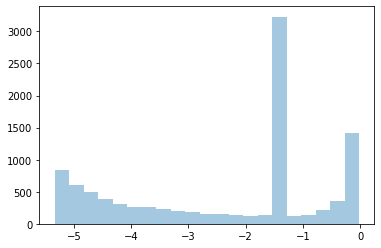

In [257]:
# Aplico transformacion  boxcox
sns.distplot(stats.boxcox(test_total_no_out['instrumentalness'])[0], kde=False);

In [258]:
test_total_no_out['instrumentalness'] = stats.boxcox(test_total_no_out['instrumentalness'])[0]


C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [259]:
test_total = test_total_no_out
test_total.head()

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
33553,Scott Hamilton,60.0,0.9150,0.487,219019.0,0.135,-3.636274,D,0.686,-11.211,1,0.0434,105.854,0.240,Jazz
9427,Queens of the Stone Age,33.0,0.0169,0.483,158067.0,0.903,-2.310026,C,0.115,-5.767,1,0.0738,159.775,0.737,Blues
199,Makaya McCraven,36.0,0.6380,0.396,314800.0,0.380,-0.176439,E,0.111,-12.908,1,0.0429,150.013,0.618,Jazz
12447,The Rolling Stones,63.0,0.8340,0.518,196493.0,0.543,-1.489131,C,0.200,-10.766,0,0.0297,104.52799999999999,0.579,Rock
39489,Kodak Black,72.0,0.0996,0.715,130929.0,0.617,-5.206685,B,0.186,-5.558,1,0.2400,176.11700000000002,0.283,Hip-Hop


In [260]:
test_total.shape

(9963, 15)

### 12.D. COLUMNA LIVENESS

In [261]:
test_total_no_out_live = test_total[test_total['liveness'] < live_cortesuperior]

In [262]:
test_total_no_out_live

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
33553,Scott Hamilton,60.0,0.91500,0.487,219019.0,0.135,-3.636274,D,0.686,-11.211,1,0.0434,105.854,0.240,Jazz
9427,Queens of the Stone Age,33.0,0.01690,0.483,158067.0,0.903,-2.310026,C,0.115,-5.767,1,0.0738,159.775,0.737,Blues
199,Makaya McCraven,36.0,0.63800,0.396,314800.0,0.380,-0.176439,E,0.111,-12.908,1,0.0429,150.013,0.618,Jazz
12447,The Rolling Stones,63.0,0.83400,0.518,196493.0,0.543,-1.489131,C,0.200,-10.766,0,0.0297,104.52799999999999,0.579,Rock
39489,Kodak Black,72.0,0.09960,0.715,130929.0,0.617,-5.206685,B,0.186,-5.558,1,0.2400,176.11700000000002,0.283,Hip-Hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28567,Dillon Francis,33.0,0.13200,0.819,68574.0,0.930,-3.695494,C#,0.133,-2.151,0,0.2140,112.036,0.747,Electronic
25079,Jameson Rodgers,41.0,0.10600,0.550,219019.0,0.832,-1.489131,C#,0.102,-5.089,0,0.0355,102.012,0.469,Country
18707,Marty Stuart,37.0,0.00437,0.644,193173.0,0.644,-4.855502,F,0.178,-10.298,0,0.0321,133.648,0.591,Country
15200,Antonio Vivaldi,30.0,0.76700,0.464,133681.0,0.312,-3.490282,C,0.313,-19.499,0,0.0356,119.62200000000001,0.701,Classical


In [263]:
test_total_no_out_live.shape

(9956, 15)

In [264]:
test_total_no_out_live['liveness']= np.log(test_total_no_out_live['liveness'])

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [265]:
test_total = test_total_no_out_live
test_total.head()

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
33553,Scott Hamilton,60.0,0.9150,0.487,219019.0,0.135,-3.636274,D,-0.376878,-11.211,1,0.0434,105.854,0.240,Jazz
9427,Queens of the Stone Age,33.0,0.0169,0.483,158067.0,0.903,-2.310026,C,-2.162823,-5.767,1,0.0738,159.775,0.737,Blues
199,Makaya McCraven,36.0,0.6380,0.396,314800.0,0.380,-0.176439,E,-2.198225,-12.908,1,0.0429,150.013,0.618,Jazz
12447,The Rolling Stones,63.0,0.8340,0.518,196493.0,0.543,-1.489131,C,-1.609438,-10.766,0,0.0297,104.52799999999999,0.579,Rock
39489,Kodak Black,72.0,0.0996,0.715,130929.0,0.617,-5.206685,B,-1.682009,-5.558,1,0.2400,176.11700000000002,0.283,Hip-Hop


In [266]:
test_total.shape

(9956, 15)

### 12.E. COLUMNA 'KEY'

In [267]:
# Sustituyo notas inglés por notas español
test_total['key'] = test_total['key'].apply(esc_esp)

# Hago get_dummies para separar por columnas, eliminando al primera para evitar colinealidad
test_total = pd.get_dummies(test_total, columns = ['key'], drop_first = True)

test_total.head()

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
33553,Scott Hamilton,60.0,0.9150,0.487,219019.0,0.135,-3.636274,-0.376878,-11.211,1,...,0,0,0,0,0,1,0,0,0,0
9427,Queens of the Stone Age,33.0,0.0169,0.483,158067.0,0.903,-2.310026,-2.162823,-5.767,1,...,0,0,0,0,0,0,0,0,0,0
199,Makaya McCraven,36.0,0.6380,0.396,314800.0,0.380,-0.176439,-2.198225,-12.908,1,...,0,0,0,0,1,0,0,0,0,0
12447,The Rolling Stones,63.0,0.8340,0.518,196493.0,0.543,-1.489131,-1.609438,-10.766,0,...,0,0,0,0,0,0,0,0,0,0
39489,Kodak Black,72.0,0.0996,0.715,130929.0,0.617,-5.206685,-1.682009,-5.558,1,...,0,0,0,0,0,0,0,1,0,0


### 12.F. COLUMNA 'TEMPO'

In [268]:
# localizo caracteres '?' y los sustituyo por valor nuerico no posible, es decir no tenemos el valor dle tempo de estas canciones
test_total['tempo'] = test_total['tempo'].str.replace('?', '-1.5')

# Convierto variable 'tempo' a float
test_total['tempo'] = np.round(test_total['tempo'].astype(float), 2)

# Extraigo las canciones sin tempo que ahora valen -1.5
sin_tempo = test_total[(test_total['tempo']==-1.5)].index
test_total_contempo = test_total.drop(index = sin_tempo)

# A las canciones sin tempo les pongo el tempo obtenido como la mediana que obtuve en TRAIN
test_total['tempo'] = test_total['tempo'].replace(-1.5, mediana_tempo)

test_total['tempo']

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


33553    105.85
9427     159.78
199      150.01
12447    104.53
39489    176.12
          ...  
28567    112.04
25079    102.01
18707    133.65
15200    119.62
5857      99.86
Name: tempo, Length: 9956, dtype: float64

In [269]:
test_total.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,9956.0,44.374749,15.565667,0.000000,34.000000,45.000000,56.000000,95.000000
acousticness,9956.0,0.300438,0.337110,0.000001,0.020100,0.143000,0.524000,0.996000
danceability,9956.0,0.560900,0.177500,0.059600,0.446000,0.569000,0.689000,0.980000
duration_ms,9956.0,240363.525814,83397.020842,22750.000000,196066.000000,220322.000000,269890.000000,784493.000000
energy,9956.0,0.601194,0.259815,0.000792,0.441000,0.640000,0.810250,0.999000
instrumentalness,9956.0,-2.388401,1.742593,-5.338235,-4.215791,-1.489131,-1.489131,-0.017121
liveness,9956.0,-1.878909,0.665241,-4.297685,-2.328159,-2.063568,-1.409565,-0.021224
loudness,9956.0,-9.036736,5.988539,-47.046000,-10.792250,-7.318000,-5.152000,1.342000
mode,9956.0,0.364102,0.481202,0.000000,0.000000,0.000000,1.000000,1.000000
speechiness,9956.0,0.094132,0.102342,0.022500,0.035800,0.048600,0.099500,0.920000


### 12.G. ELIMINACION COLUMNAs Artist_name, Acousticness y Energy

In [270]:
# En Train ya se decidio prescindir de estas 3 columnas, asi que lo aplico sobre Test

test_total.drop(columns=['artist_name', 'acousticness', 'energy'], inplace=True) 

In [271]:
test_total

,popularity,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
33553,60.0,0.487,219019.0,-3.636274,-0.376878,-11.211,1,0.0434,105.85,0.240,...,0,0,0,0,0,1,0,0,0,0
9427,33.0,0.483,158067.0,-2.310026,-2.162823,-5.767,1,0.0738,159.78,0.737,...,0,0,0,0,0,0,0,0,0,0
199,36.0,0.396,314800.0,-0.176439,-2.198225,-12.908,1,0.0429,150.01,0.618,...,0,0,0,0,1,0,0,0,0,0
12447,63.0,0.518,196493.0,-1.489131,-1.609438,-10.766,0,0.0297,104.53,0.579,...,0,0,0,0,0,0,0,0,0,0
39489,72.0,0.715,130929.0,-5.206685,-1.682009,-5.558,1,0.2400,176.12,0.283,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28567,33.0,0.819,68574.0,-3.695494,-2.017406,-2.151,0,0.2140,112.04,0.747,...,0,0,0,0,0,0,0,0,0,0
25079,41.0,0.550,219019.0,-1.489131,-2.282782,-5.089,0,0.0355,102.01,0.469,...,0,0,0,0,0,0,0,0,0,0
18707,37.0,0.644,193173.0,-4.855502,-1.725972,-10.298,0,0.0321,133.65,0.591,...,1,0,0,0,0,0,0,0,0,0
15200,30.0,0.464,133681.0,-3.490282,-1.161552,-19.499,0,0.0356,119.62,0.701,...,0,0,0,0,0,0,0,0,0,0


### 12.H. COLUMNA 'LOUDNESS'

In [272]:
test_total_no_out_loud = test_total[test_total['loudness'] > loud_corteinferior]

In [273]:
test_total_no_out_loud

,popularity,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
33553,60.0,0.487,219019.0,-3.636274,-0.376878,-11.211,1,0.0434,105.85,0.240,...,0,0,0,0,0,1,0,0,0,0
9427,33.0,0.483,158067.0,-2.310026,-2.162823,-5.767,1,0.0738,159.78,0.737,...,0,0,0,0,0,0,0,0,0,0
199,36.0,0.396,314800.0,-0.176439,-2.198225,-12.908,1,0.0429,150.01,0.618,...,0,0,0,0,1,0,0,0,0,0
12447,63.0,0.518,196493.0,-1.489131,-1.609438,-10.766,0,0.0297,104.53,0.579,...,0,0,0,0,0,0,0,0,0,0
39489,72.0,0.715,130929.0,-5.206685,-1.682009,-5.558,1,0.2400,176.12,0.283,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28567,33.0,0.819,68574.0,-3.695494,-2.017406,-2.151,0,0.2140,112.04,0.747,...,0,0,0,0,0,0,0,0,0,0
25079,41.0,0.550,219019.0,-1.489131,-2.282782,-5.089,0,0.0355,102.01,0.469,...,0,0,0,0,0,0,0,0,0,0
18707,37.0,0.644,193173.0,-4.855502,-1.725972,-10.298,0,0.0321,133.65,0.591,...,1,0,0,0,0,0,0,0,0,0
15200,30.0,0.464,133681.0,-3.490282,-1.161552,-19.499,0,0.0356,119.62,0.701,...,0,0,0,0,0,0,0,0,0,0


In [274]:
test_total_no_out_loud.shape

(9943, 22)

In [275]:
test_total_no_out_live['liveness']= np.log(test_total_no_out_live['liveness'])

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [276]:
test_total = test_total_no_out_loud
test_total.head()

,popularity,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
33553,60.0,0.487,219019.0,-3.636274,-0.376878,-11.211,1,0.0434,105.85,0.240,...,0,0,0,0,0,1,0,0,0,0
9427,33.0,0.483,158067.0,-2.310026,-2.162823,-5.767,1,0.0738,159.78,0.737,...,0,0,0,0,0,0,0,0,0,0
199,36.0,0.396,314800.0,-0.176439,-2.198225,-12.908,1,0.0429,150.01,0.618,...,0,0,0,0,1,0,0,0,0,0
12447,63.0,0.518,196493.0,-1.489131,-1.609438,-10.766,0,0.0297,104.53,0.579,...,0,0,0,0,0,0,0,0,0,0
39489,72.0,0.715,130929.0,-5.206685,-1.682009,-5.558,1,0.2400,176.12,0.283,...,0,0,0,0,0,0,0,1,0,0


In [277]:
test_total.shape

(9943, 22)

## 12.1. > Guardo X_test modificado

In [278]:
X_test = test_total.drop(columns=['music_genre'])


In [279]:
X_test.to_csv('csvs/X_test_modified_noAcousticEnergy.csv')

In [280]:

X_test = pd.read_csv('csvs/X_test_modified_noAcousticEnergy.csv')
X_test.head(10)


,Unnamed: 0,popularity,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,tempo,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
0,33553,60.0,0.487,219019.0,-3.636274,-0.376878,-11.211,1,0.0434,105.85,...,0,0,0,0,0,1,0,0,0,0
1,9427,33.0,0.483,158067.0,-2.310026,-2.162823,-5.767,1,0.0738,159.78,...,0,0,0,0,0,0,0,0,0,0
2,199,36.0,0.396,314800.0,-0.176439,-2.198225,-12.908,1,0.0429,150.01,...,0,0,0,0,1,0,0,0,0,0
3,12447,63.0,0.518,196493.0,-1.489131,-1.609438,-10.766,0,0.0297,104.53,...,0,0,0,0,0,0,0,0,0,0
4,39489,72.0,0.715,130929.0,-5.206685,-1.682009,-5.558,1,0.2400,176.12,...,0,0,0,0,0,0,0,1,0,0
5,42724,59.0,0.595,220133.0,-5.026046,-2.111965,-6.764,1,0.0540,120.08,...,1,0,0,0,0,0,0,0,0,0
6,10822,36.0,0.447,380933.0,-2.076720,-2.570465,-6.657,1,0.0860,153.76,...,1,0,0,0,0,0,0,0,0,0
7,49498,33.0,0.794,301977.0,-2.958689,-1.555897,-5.294,1,0.0779,91.04,...,0,0,0,0,1,0,0,0,0,0
8,4144,40.0,0.536,218040.0,-3.606730,-0.673345,-6.266,0,0.0279,144.04,...,0,0,0,0,0,0,0,0,1,0
9,36958,54.0,0.512,304427.0,-4.202528,-1.130103,-6.857,0,0.0343,114.96,...,0,0,0,0,0,0,0,0,1,0


In [281]:
X_test.drop(columns=['Unnamed: 0'], inplace=True)

## 13. ESTANDARIZACION DE X_TEST

In [282]:
X_test_scal = scaler.transform(X_test)

In [283]:
X_test_scal = pd.DataFrame(X_test_scal,
                       index=X_test.index,
                       columns=X_test.columns)

X_test_scal.head(5)

,popularity,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
0,1.013124,-0.409449,-0.238809,-0.679633,2.289930,-0.353053,1.342698,-0.496585,-0.489059,-0.884010,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,2.924454,-0.179589,-0.287891,-0.360134,-0.266344
1,-0.729988,-0.431976,-0.976358,0.066285,-0.415983,0.543672,1.342698,-0.196678,1.370107,1.133897,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
2,-0.536309,-0.921929,0.920189,1.266274,-0.469621,-0.632580,1.342698,-0.501517,1.033299,0.650736,...,-0.307488,-0.258507,-0.326158,-0.267805,3.527221,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
3,1.206803,-0.234868,-0.511385,0.527979,0.422459,-0.279753,-1.202430,-0.631740,-0.534565,0.492389,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
4,1.787840,0.874567,-1.304742,-1.562876,0.312506,0.578098,1.342698,1.442945,1.933407,-0.709423,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,3.473537,-0.360134,-0.266344


In [284]:
X_test_scal.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,9943.0,0.005368,1.004851,-2.860457,-0.665428,0.044729,0.754885,3.272713
danceability,9943.0,0.008933,0.998064,-2.816416,-0.634715,0.052346,0.728144,2.366954
duration_ms,9943.0,0.019162,1.008564,-2.613761,-0.515850,-0.222909,0.376156,6.603707
instrumentalness,9943.0,0.020705,0.979760,-1.636863,-1.006547,0.527979,0.527979,1.355879
liveness,9943.0,0.015285,1.007850,-3.650545,-0.666098,-0.253717,0.729938,2.828786
loudness,9943.0,0.012164,0.967284,-4.902896,-0.275800,0.289512,0.646045,1.714653
mode,9943.0,-0.275300,1.224845,-1.202430,-1.202430,-1.202430,1.342698,1.342698
speechiness,9943.0,0.004159,1.009654,-0.702771,-0.571561,-0.445285,0.057355,8.151388
tempo,9943.0,0.001294,1.005086,-2.953929,-0.803459,-0.004359,0.663224,3.286155
valence,9943.0,0.004688,1.003866,-1.775219,-0.814987,-0.019193,0.780662,2.157062


## 13.1. > Guardo CSV de X_test modificado y estandarizado

In [285]:
X_test_scal.to_csv('csvs/X_test_modified_and_scaled_noAcousticEnergy.csv')

In [286]:
X_test_scal = pd.read_csv('csvs/X_test_modified_and_scaled_noAcousticEnergy.csv')
X_test_scal.head(10)


,Unnamed: 0,popularity,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,tempo,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
0,0,1.013124,-0.409449,-0.238809,-0.679633,2.289930,-0.353053,1.342698,-0.496585,-0.489059,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,2.924454,-0.179589,-0.287891,-0.360134,-0.266344
1,1,-0.729988,-0.431976,-0.976358,0.066285,-0.415983,0.543672,1.342698,-0.196678,1.370107,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
2,2,-0.536309,-0.921929,0.920189,1.266274,-0.469621,-0.632580,1.342698,-0.501517,1.033299,...,-0.307488,-0.258507,-0.326158,-0.267805,3.527221,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
3,3,1.206803,-0.234868,-0.511385,0.527979,0.422459,-0.279753,-1.202430,-0.631740,-0.534565,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
4,4,1.787840,0.874567,-1.304742,-1.562876,0.312506,0.578098,1.342698,1.442945,1.933407,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,3.473537,-0.360134,-0.266344
5,5,0.948564,0.198769,-0.225329,-1.461280,-0.338927,0.379448,1.342698,-0.392012,0.001501,...,3.252154,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
6,6,-0.536309,-0.634715,1.720431,0.197503,-1.033607,0.397073,1.342698,-0.076320,1.162575,...,3.252154,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
7,7,-0.729988,1.319468,0.765024,-0.298540,0.503579,0.621584,1.342698,-0.156230,-0.999615,...,-0.307488,-0.258507,-0.326158,-0.267805,3.527221,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
8,8,-0.278070,-0.133498,-0.250655,-0.663017,1.840748,0.461478,-1.202430,-0.649498,0.827491,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344
9,9,0.625766,-0.268658,0.794670,-0.998110,1.148707,0.364130,-1.202430,-0.586359,-0.175004,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344


In [287]:
X_test_scal.drop(columns=['Unnamed: 0'], inplace=True)

In [288]:
X_test_scal.shape

(9943, 21)

## 14. TRATAMIENTO Y_TEST(igual que en y_train)

In [289]:
y_test = test_total['music_genre']

In [290]:
y_test.shape

(9943,)

### LABEL ENCODER A Y_TEST

In [291]:
y_test.value_counts()

Rap            1023
Hip-Hop        1015
Rock           1011
Electronic     1008
Alternative    1002
Blues          1000
Anime           987
Country         986
Jazz            981
Classical       930
Name: music_genre, dtype: int64

In [292]:
y_test = le.fit_transform(y_test)

In [293]:

y_test = pd.Series(y_test, name= 'music_genre')
y_test.value_counts()


8    1023
6    1015
9    1011
5    1008
0    1002
2    1000
1     987
4     986
7     981
3     930
Name: music_genre, dtype: int64

## 14.1. > Guardo CSV de y_test modificado

In [294]:
y_test.to_csv('csvs/y_test_transformed_noAcousticEnergy.csv')

In [295]:
y_test = pd.read_csv('csvs/y_test_transformed_noAcousticEnergy.csv')
y_test.head(10)

,Unnamed: 0,music_genre
0,0,7
1,1,2
2,2,7
3,3,9
4,4,6
5,5,8
6,6,7
7,7,5
8,8,4
9,9,9


In [296]:

y_test.drop(columns=['Unnamed: 0'], inplace=True)

In [297]:
print(X_test.shape)
print(X_test_scal.shape)
print(y_test.shape)

(9943, 21)
(9943, 21)
(9943, 1)
